<a href="https://colab.research.google.com/github/ShubhPathania/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Shubham Pathania




# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/ShubhPathania/Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import warnings
from pandas.errors import SettingWithCopyWarning
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
try:
  zomato_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/Zomato Restaurant names and Metadata.csv")
  reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/Zomato Restaurant reviews.csv")
  print("Dataset loaded successfully.")
except:
  print("Some Error occured.")

Dataset loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
zomato_df_first_look = zomato_df.head()
zomato_df_first_look

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
reviews_df_first_look = reviews_df.head()
reviews_df_first_look

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

# Rows and coulumn count for zomato_df
zdf_num_rows, zdf_num_columns = zomato_df.shape

print("\033[1m\033[3mZomato Restaurant Dataset\033[0m:")
print(f"Number of Rows: {zdf_num_rows}\nNumber of Columns: {zdf_num_columns}\n\n{'--'*18}")

# Rows and coulumn count for reviews_df
rdf_num_rows, rdf_num_columns = reviews_df.shape

print("\n\033[1m\033[3mZomato Restaurant Reviews Dataset\033[0m:")
print(f"Number of Rows:{rdf_num_rows}\nNumber of Columns: {rdf_num_columns}\n")

Zomato Restaurant Dataset:
Number of Rows: 105
Number of Columns: 6

------------------------------------

Zomato Restaurant Reviews Dataset:
Number of Rows:10000
Number of Columns: 7



### Dataset Information

In [7]:
# Dataset Info for zomato_df
print("----> \033[1m\033[4mRestaurant Info:\033[0m\n")
zomato_df.info()

print(f"\n{'--'*20}\n")

# Dataset Info for reviews_df
print("----> \033[1m\033[4mReviews Info:\033[0m\n")
reviews_df.info()

----> Restaurant Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

----------------------------------------

----> Reviews Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures

#### Duplicate Values

In [8]:
# Duplicate values in 'zomato_df'
print("Number of duplicate values in zomato_df:", zomato_df.duplicated().sum())

# Duplicate values in 'reviews_df'
print("Number of duplicate values in reviews_df:", reviews_df.duplicated().sum())

Number of duplicate values in zomato_df: 0
Number of duplicate values in reviews_df: 36


In [9]:
# Duplicate value Count for each column in 'zomato_df'
zomato_dup = zomato_df.apply(lambda x: x.duplicated().sum())
print("Number of duplicate values for each column in 'zomato_df':\n")
print(f"{zomato_dup}\n\n{'--'*30}")

# Duplicate value Count for each column in 'reviews_df'
reviews_dup = reviews_df.apply(lambda x: x.duplicated().sum())
print("\nNumber of duplicate values for each column in 'reviews_df':\n")
print(reviews_dup)

Number of duplicate values for each column in 'zomato_df':

Name            0
Links           0
Cost           76
Collections    62
Cuisines       13
Timings        27
dtype: int64

------------------------------------------------------------

Number of duplicate values for each column in 'reviews_df':

Restaurant    9900
Reviewer      2553
Review         635
Rating        9989
Metadata      7522
Time           217
Pictures      9964
dtype: int64


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count in 'zomato_df'
zomato_null = zomato_df.isnull().sum()
print("Number of missing values for each column in 'zomato_df':\n")
print(zomato_null, f"\nTotal number of missing values: {zomato_df.isnull().sum().sum()}")

print("--"*28)

# Missing Values/Null Values Count in 'reviews_df'
reviews_null = reviews_df.isnull().sum()
print("\nNumber of missing values for each column in 'reviews_df':\n")
print(reviews_null, f"\nTotal number of missing values: {reviews_df.isnull().sum().sum()}")

Number of missing values for each column in 'zomato_df':

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 
Total number of missing values: 55
--------------------------------------------------------

Number of missing values for each column in 'reviews_df':

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64 
Total number of missing values: 197


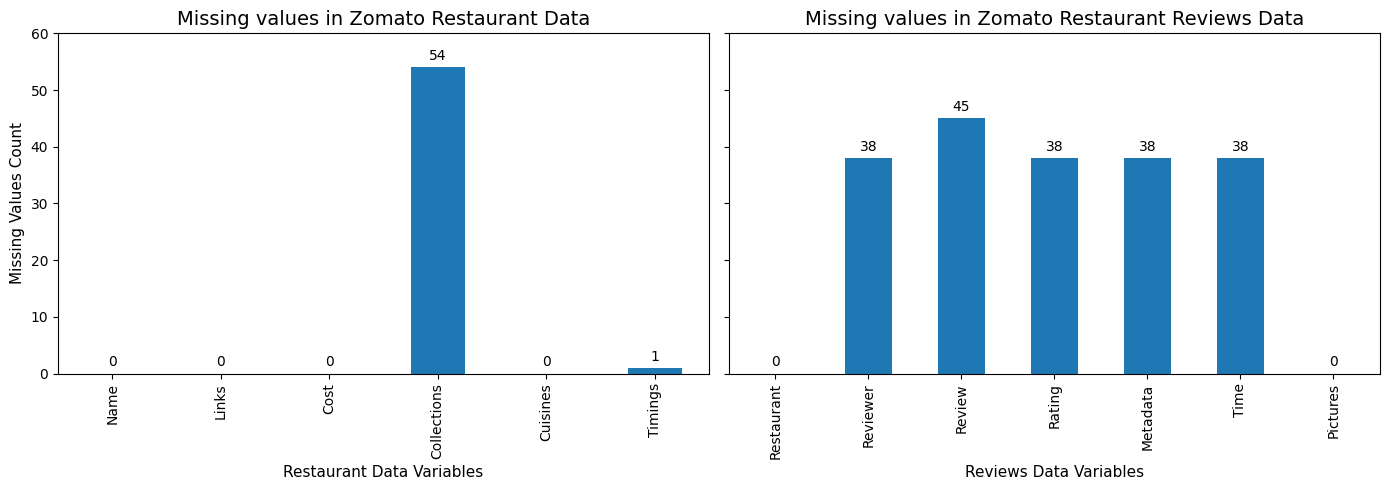

In [11]:
# Visualizing the missing values
fig, axes = plt.subplots(1, 2, figsize= (14, 5), sharey= True)

# Plot for Zomato Restaurant Data
bars1 = zomato_null.plot(kind='bar', ax= axes[0])
axes[0].set_title("Missing values in Zomato Restaurant Data", size= 14)
axes[0].set_ylim(0, 60)
axes[0].set_xlabel("Restaurant Data Variables", size= 11)
axes[0].set_ylabel("Missing Values Count", size= 11)

# Annotate bars for Zomato Restaurant Data
for bar in bars1.patches:
  height = bar.get_height()
  axes[0].annotate(f'{int(height)}', xy= (bar.get_x() + bar.get_width() / 2, height),
                   xytext= (0, 3), textcoords="offset points", ha='center', va='bottom')

# Plot for Zomato Restaurant Reviews Data
bars2 = reviews_null.plot(kind='bar', ax= axes[1])
axes[1].set_title("Missing values in Zomato Restaurant Reviews Data", size= 14)
axes[1].set_xlabel("Reviews Data Variables", size= 11)
axes[1].set_ylim(0, 60)

# Annotate bars for Zomato Restaurant Reviews Data
for bar in bars2.patches:
  height = bar.get_height()
  axes[1].annotate(f'{int(height)}', xy= (bar.get_x() + bar.get_width() / 2, height),
                   xytext= (0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# Summary of Dataset
def restaurant_info(df):
  col = pd.DataFrame(index= df.columns)
  col["data_type"] = df.dtypes
  col["duplicate_count"] = df.duplicated().sum()
  col["missing/Null values"] = df.isnull().sum()
  col["count of non_null_values"] = df.count()

  return col

In [13]:
print("\t\t\t\033[1m\033[36mSummary of Zomato Restaurant Dataset\033[0m\n")
restaurant_info(zomato_df)

			Summary of Zomato Restaurant Dataset



,data_type,duplicate_count,missing/Null values,count of non_null_values
Name,object,0,0,105
Links,object,0,0,105
Cost,object,0,0,105
Collections,object,0,54,51
Cuisines,object,0,0,105
Timings,object,0,1,104


In [14]:
print("\t\t\t\033[1m\033[36mSummary of Zomato Restaurant Reviews Dataset\033[0m\n")
restaurant_info(reviews_df)

			Summary of Zomato Restaurant Reviews Dataset



,data_type,duplicate_count,missing/Null values,count of non_null_values
Restaurant,object,36,0,10000
Reviewer,object,36,38,9962
Review,object,36,45,9955
Rating,object,36,38,9962
Metadata,object,36,38,9962
Time,object,36,38,9962
Pictures,int64,36,0,10000


### What did you know about your dataset?

From the Data Exploration we have done so far, we come to know that;

- The **zomato restaurant dataset** has ***105 rows*** and ***6 columns***.
- The **zomato restaurant reviews** dataset has ***10,000 rows*** and ***7 columns***.

Additionally, several data quality issues were found in both datasets:

**1. Incorrect DataTypes:**
  - In the Zomato restaurant dataset, all columns appear to be of object datatype. However, it is observed that the `'cost'` column contains all integer values. Therefore, it is necessary to convert it to the integer datatype.

  - In the Zomato restaurant reviews dataset, there is only one column with integer datatype, and the rest are of object datatype. However, it is observed that the `'Rating'` column contains all integer values, and the `'Time'` column contains date and time. Therefore, it is necessary to convert them to their respective datatypes (`Rating` to `int64` and `Time` to `datetime`).

**2. Duplicate Values:**
  - There were no duplicate rows in the Zomato restaurant dataset. However, the Zomato restaurant reviews dataset has 36 duplicate rows.

**3. Missing Values:**
  - In the Zomato restaurant dataset, there are 55 missing values. Specifically, the `'Timings'` column has 1 missing value, and the `'Collection'` column has 54 missing/null values.

  - In the Zomato restaurant reviews dataset, there are 197 missing values. The `'Review'` column has 45 missing values, while the `'Reviewer'`, `'Rating'`, `'Metadata'`, and `'Time'` columns each have 38 missing values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print("\033[1m\033[3mVariables of Zomato restaurant dataset:\033[0m\n")
restaurant_columns = zomato_df.columns.to_list()
for column in restaurant_columns:
  print(column)

print("--"*23)

print("\n\033[1m\033[3mVariables of Zomato restaurant reviews dataset:\033[0m\n")
reviews_columns = reviews_df.columns.to_list()
for column in reviews_columns:
  print(column)

Variables of Zomato restaurant dataset:

Name
Links
Cost
Collections
Cuisines
Timings
----------------------------------------------

Variables of Zomato restaurant reviews dataset:

Restaurant
Reviewer
Review
Rating
Metadata
Time
Pictures


In [16]:
# Dataset Describe
zomato_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [17]:
reviews_df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

**Variables Description for Zomato Restaurant Dataset:**

1. **Name:** The name of the restaurant.
2. **Links:** The URL link to the restaurant's page on Zomato.
3. **Cost:** The average dining cost per visit to the restaurant.
4. **Collections:** The collections or tags associated with the restaurant on Zomato.
5. **Cuisines:** The types of cuisines offered by the restaurant.
6. **Timings:**  The operating hours of the restaurant.

**Variables Description for Zomato Restaurant Reviews Dataset:**

1. **Restaurant:** The name of the restaurant being reviewed.
2. **Reviewer:** The name of the reviewer.
3. **Review:** The text of the review posted by the reviewer.
4. **Rating:** The rating given by the reviewer, on a scale of 1 to 5.
5. **Metadata:** The information about the reviewer, such as (number of reviews and the number of followers they have on Zomato).
6. **Time:** The date and time when the review was posted.
7. **Pictures:** The number of pictures attched in the review.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print("\033[1m\033[3mZomato Restaurant Data >\033[0m\n\n\033[36mNumber of unique values in:\033[0m")
for column in zomato_df.columns.to_list():
  print(f"{column}: {zomato_df[column].nunique()}")

print(f"\n{'--'*17}\n")

print("\033[1m\033[3mZomato Restaurant Reviews Data >\033[0m\n\n\033[36mNumber of unique values in:\033[0m")
for column in reviews_df.columns.to_list():
  print(f"{column}: {reviews_df[column].nunique()}")

Zomato Restaurant Data >

Number of unique values in:
Name: 105
Links: 105
Cost: 29
Collections: 42
Cuisines: 92
Timings: 77

----------------------------------

Zomato Restaurant Reviews Data >

Number of unique values in:
Restaurant: 100
Reviewer: 7446
Review: 9364
Rating: 10
Metadata: 2477
Time: 9782
Pictures: 36


## ***3. Data Wrangling***

### Data Wrangling Code

**A. Zomato Restaurant Dataset:**

In [19]:
# Rename name column to restaurant
zomato_df.rename(columns= {'Name': 'Restaurant'}, inplace= True)

# Drop Links column
zomato_df.drop('Links', axis= 1, inplace= True)

* In order to merge both the datasets on common column we need to change the column Name to Restaurant.


* Dropping 'Links' column as it will not contribute much in the analysis.

In [20]:
zomato_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

* The 'Cost' column contains comma (,) separators within its values, which need to be removed.

* As previously observed, the "Cost" column is of the object data type and should be converted to integer type.

In [21]:
# Remove comma from cost values
zomato_df["Cost"] = zomato_df["Cost"].str.replace(',', '')

# Convert 'cost' column to integer
try:
  zomato_df['Cost'] = zomato_df['Cost'].astype(int)
except ValueError as e:
  print(f'Error: {e}')

print("Unique values:", zomato_df['Cost'].unique())
print("\nDatatype:", zomato_df["Cost"].dtype)

Unique values: [ 800 1300 1200 1500  500  300 1000  350  400 1600  750  550 1900  450
  150 1400 1100  600  200  900  700 1700 2500  850  650 1800 2800 1750
  250]

Datatype: int64


In [22]:
# Verify the datatype
zomato_df["Cost"].dtype

dtype('int64')

In [23]:
zomato_df['Collections'].isnull().sum()

54

There are 54 missing/null values in the collection column. We'll fill them with the value 'Unknown' since we cannot simply remove them, as they contribute to approximately 50% of the data.

In [24]:
# Filling missing values with 'Unknown'
zomato_df['Collections'].fillna('Unknown', inplace= True)

In [25]:
# Convert cuisines data into a list
zomato_df['Cuisines'] = zomato_df["Cuisines"].apply(lambda x: x.replace(" ", "").split(","))
print(zomato_df['Cuisines'])

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object


In [26]:
# Drop 'Timings' column
zomato_df.drop('Timings', axis= 1, inplace= True)

In [27]:
zomato_df.head(3)

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI..."
1,Paradise,800,Hyderabad's Hottest,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, NorthIndian, Desserts]"


In [28]:
zomato_df.dtypes

Restaurant     object
Cost            int64
Collections    object
Cuisines       object
dtype: object

**B. Zomato Restaurant Reviews Dataset:**

In [29]:
# Check unique values in rating column
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

It looks like there's an anomaly here. Let's see how many values they correspond to.

In [30]:
# Row corresponding where rating is 'Like'
reviews_df[reviews_df['Rating'] == 'Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


There is only one entry with such a value. We'll convert it to NaN. It was observed earlier that the column was of object type, so it will be converted to float type.

In [31]:
# Replace entry with 'Like' to NaN
reviews_df['Rating'] = reviews_df['Rating'].replace('Like', np.nan)

# Convert 'Rating' column to float
try:
  reviews_df['Rating'] = reviews_df['Rating'].astype(float)
except ValueError as e:
  print(f'Error: {e}')

In [32]:
reviews_df['Rating'].isna().sum()

39

**Handling missing values:** As we can see, there are 39 missing values in the 'Rating' column. Let's calculate the measures of central tendency to decide which will be best for imputing the missing values.

In [33]:
# Calculate measure of central tendency to impute missing values
def measure_of_central_tendency(column):
  """
  This function calculates the measures of central tendency (mean, median, mode)
  for Rating column.

  Parameter:
  column: The column containing numerical values for which central tendency is calculated.

  Return:
  A tuple containing the mean, median, and mode of the column.
  """
  mean_ = column.mean()
  median_ = column.median()
  mode_ = column.mode()[0]

  return mean_, median_, mode_

mean_, median_, mode_ = measure_of_central_tendency(reviews_df['Rating'])
print("Mean:", mean_)
print("Median:", median_)
print("Mode:", mode_)

Mean: 3.601044071880333
Median: 4.0
Mode: 5.0


We will simply impute the missing values with the average rating because the mean represents almost the middle range of ratings (0 to 5), while the median rating is 4, which is a high rating and can potentially skew the distribution of the 'Rating' column to the higher side.

In [34]:
# Impute missing values with mean rating
reviews_df['Rating'].fillna(round(mean_, 1), inplace= True)

# Verify missing values
reviews_df['Rating'].isna().sum()

0

In [35]:
reviews_df['Metadata'].unique()

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', ..., '65 Reviews , 423 Followers',
       '13 Reviews , 144 Followers', '472 Reviews , 1302 Followers'],
      dtype=object)

The 'Metadata' column contains the additional information about reviewers (i.e number of reviews and number of followers), which can be useful in analysis. Therefore, we need to split the column into two new columns and convert the datatype into integer type.

In [36]:
# Split the 'Metadata' column into 2 columns i.e. Reviews and Followers
reviews_df[['Reviews', 'Followers']] = reviews_df['Metadata'].str.split(',', expand= True)

print(reviews_df[['Reviews', 'Followers']])

           Reviews        Followers
0        1 Review       2 Followers
1       3 Reviews       2 Followers
2       2 Reviews       3 Followers
3        1 Review        1 Follower
4       3 Reviews       2 Followers
...            ...              ...
9995   53 Reviews      54 Followers
9996    2 Reviews      53 Followers
9997   65 Reviews     423 Followers
9998   13 Reviews     144 Followers
9999  472 Reviews    1302 Followers

[10000 rows x 2 columns]


In [37]:
# Convert 'Reviews' and 'Followers' columns to numeric values
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

# Drop the original 'Metadata' column
reviews_df.drop('Metadata', axis= 1, inplace= True)

Filling the missing values with 0, as it's not feasible to impute missing values for reviews and followers count based on any assumption.

In [38]:
# Replace missing values in 'Reviews' and 'Followers' columns with 0
reviews_df['Reviews'].fillna(0, inplace= True)
reviews_df['Followers'].fillna(0, inplace= True)

# Convert 'Reviews' and 'Followers' columns to interger type
reviews_df['Reviews'] = reviews_df['Reviews'].astype(int)
reviews_df['Followers'] = reviews_df['Followers'].astype(int)

print(reviews_df[['Reviews', 'Followers']])

      Reviews  Followers
0           1          2
1           3          2
2           2          3
3           1          1
4           3          2
...       ...        ...
9995       53         54
9996        2         53
9997       65        423
9998       13        144
9999      472       1302

[10000 rows x 2 columns]


In [39]:
# Check unique values in Time column
reviews_df['Time'].unique()

array(['5/25/2019 15:54', '5/25/2019 14:20', '5/24/2019 22:54', ...,
       '6/3/2016 10:37', '5/31/2016 17:22', '5/31/2016 16:41'],
      dtype=object)

Extracting 3 new columns (Year, Month, Hour) from 'Time' column to capture more nuances in time related studies.

In [40]:
# Convert 'Time' column to datetime format
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

# Extract 'Year', 'Month', and 'Hour' into separate columns
reviews_df['Year'] = reviews_df['Time'].dt.year
reviews_df['Month'] = reviews_df['Time'].dt.month
reviews_df['Hour'] = reviews_df['Time'].dt.hour

In [41]:
# Check missing values in reviews data
reviews_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating         0
Time          38
Pictures       0
Reviews        0
Followers      0
Year          38
Month         38
Hour          38
dtype: int64

In [42]:
# Drop the remaining missing data from the dataset
reviews_df.dropna(inplace= True)
reviews_df.reset_index(inplace= True)
reviews_df = reviews_df.drop('index', axis= 1)

In [43]:
# Convert 'Year', 'Month', and 'Hour' columns into interger type
reviews_df['Year'] = reviews_df['Year'].astype(int)
reviews_df['Month'] = reviews_df['Month'].astype(int)
reviews_df['Hour'] = reviews_df['Hour'].astype(int)

In [44]:
reviews_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [45]:
print(f"Shape of Cleaned Reviews Data:{ reviews_df.shape}\n")
reviews_df.head(3)

Shape of Cleaned Reviews Data:(9955, 11)



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,2019,5,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,2019,5,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,2019,5,22


In [46]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Time        9955 non-null   datetime64[ns]
 5   Pictures    9955 non-null   int64         
 6   Reviews     9955 non-null   int64         
 7   Followers   9955 non-null   int64         
 8   Year        9955 non-null   int64         
 9   Month       9955 non-null   int64         
 10  Hour        9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 855.6+ KB


### **Merge the Datasets**

In [47]:
# Make copies of clenaed data
zomato_clean = zomato_df.copy()
reviews_clean = reviews_df.copy()

In [48]:
# Merging both the DataFrames by common column 'Restaurant'
merged_df = pd.merge(zomato_clean, reviews_clean, on='Restaurant', how='inner')

In [49]:
merged_df

,Restaurant,Cost,Collections,Cuisines,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,2019,5,15
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,2019,5,14
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,2019,5,22
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,2019,5,22
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, SouthI...",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,2019,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,1000,Unknown,"[Chinese, Seafood]",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0,53,54,2016,6,0
9951,Chinese Pavilion,1000,Unknown,"[Chinese, Seafood]",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0,2,53,2016,6,22
9952,Chinese Pavilion,1000,Unknown,"[Chinese, Seafood]",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3,65,423,2016,6,10
9953,Chinese Pavilion,1000,Unknown,"[Chinese, Seafood]",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0,13,144,2016,5,17


In [50]:
merged_df.isna().sum()

Restaurant     0
Cost           0
Collections    0
Cuisines       0
Reviewer       0
Review         0
Rating         0
Time           0
Pictures       0
Reviews        0
Followers      0
Year           0
Month          0
Hour           0
dtype: int64

### What all manipulations have you done and insights you found?

The detailed overview of all the manipulations done till now is as followed as:

**Manipulations:**

A. Data Cleaning and Data Transformation

**Zomato Restaurant Dataset:**

The dataset contained six columns. Data cleaning was performed column-wise for better understanding and to find relationships between the variables. The data wrangling for each column is as follows:

1. Name: To merge both datasets on a common column, we needed to change the column name from "Name" to "Restaurant."

2. Links and Timings: The column were dropped as they were non-contributory to the analysis.

3. Cost:  The 'Cost' column contained comma (`,`) separators within the values, which needed to be removed. The column, initially of object datatype, was corrected to integer type.

4. Collections: There were 54 missing/null values in the 'Collections' column. Removing them was not feasible as they contributed to approximately 50% of the data. Therefore, they were filled with the value 'Unknown.'

5. Cuisines: Standardized cuisines data by cconverting into list.

**Zomato Restaurant Reviews Dataset:**

1. Rating: There was one entry in the dataset with the value 'Like,' which was unusual. Hence, it was changed to NaN, and since the column was of object datatype, it was corrected to float type. Checking for missing values revealed 39 missing values in the column. Measures of central tendency were calculated to decide the best method for imputing the missing values. Missing values were imputed with the average rating because the mean represented almost the middle range of ratings (0 to 5), while the median rating was 4, which is a high rating and could potentially skew the distribution of the 'Rating' column to the higher side.

2. Metadata: This column contained additional information about reviewers (i.e., number of reviews and number of followers), which could be useful in analysis. Therefore, split the column into two new columns: 'Reviews' and 'Followers'. Missing values were filled with 0, as it was not feasible to impute missing values for reviews and followers count based on assumptions. The datatype was converted to integer type, and the original column ('Metadata') was dropped from the dataframe.

3. Time: The column was converted from object datatype to datetime, and three new columns were extracted: Year, Month, and Hour, to capture more nuances in the time-related analysis.

Remaining missing values were dropped from the dataframe.

B. Data Integration

Made copies of both the cleaned datasets as (zomato_clean and reviews_clean) to maintain a record of cleaned data. Then, both datasets were merged based on the common column 'Restaurant'for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 (Top 10 Cuisines Based on Ratings)**

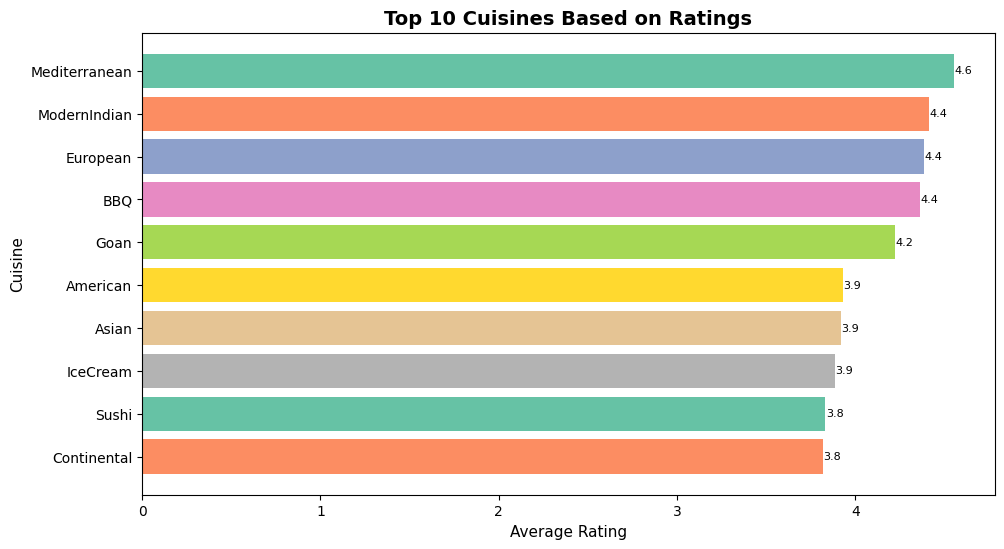

In [51]:
# Unnesting Cuisines column and creating a DataFrame
cuisines_df = merged_df[['Cuisines', 'Rating']].explode('Cuisines')

# Grouping by Cuisine and calculating the average rating
top_cuisines = cuisines_df.groupby('Cuisines')['Rating'].mean().sort_values(ascending= False).head(10)

# Plot the horizontal bar chart
plt.figure(figsize= (11, 6))
bars = plt.barh(top_cuisines.index, top_cuisines, color= sns.color_palette('Set2'))

# Set chart title and axis labels
plt.title('Top 10 Cuisines Based on Ratings', size= 14, weight='bold')
plt.xlabel('Average Rating', size= 11)
plt.ylabel('Cuisine', size= 11)
plt.gca().invert_yaxis()

# Add annotations next to each bar
for bar, rating in zip(bars, top_cuisines):
  plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height() / 2, f'{rating:.1f}', size= 8, ha='left', va='center')

plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because of its effectiveness of easily comparing ratings across different cuisines, where bars lengths directly corresponds to the average ratings, aiding quick visual assessment of which cuisines are rated higher or lower.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- High-Rated Cuisines: Mediterranean cuisine stands out with the highest average rating of 4.6, suggesting its exceptional popularity among customers. This indicates a strong preference for Mediterranean food.

- Popular Options: Modern Indian, European, BBQ and Goan cuisines all share a similar rating of 4.4. This suggests their popularity and generally high customer satisfaction. These cuisines might be strong contenders for the Mediterranean cuisine's top spot.

- Moderate Satisfaction: Cuisines like American, Asian, Ice Cream, Sushi and Continental fall into the 3.8 to 3.9 average rating range. This indicates moderate customer satisfaction. There's room for improvement for these cuisines to compete with the higher-rated options.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

- By identifying highly-rated cuisines (Mediterranean, Modern Indian, European, BBQ, Goan), restaurants can tailor their marketing efforts to promote these popular options and attract new customers.

- Analyzing cuisines with moderate satisfaction ratings like American, Asian, Ice Cream, Sushi and Continental provides valuable insights for restaurant operators. By considering adding highly rated cuisines to their menus, they can potentially improve customer satisfaction and overall ratings. This strategy not only broadens the menu appeal but also addresses customer preferences more closely aligned with higher-rated offerings.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, focusing on high-rated options is important, but neglecting moderate-rated cuisines could lead to lower ratings over time.

#### **Chart - 2 (Distribution of Restaurant cost)**

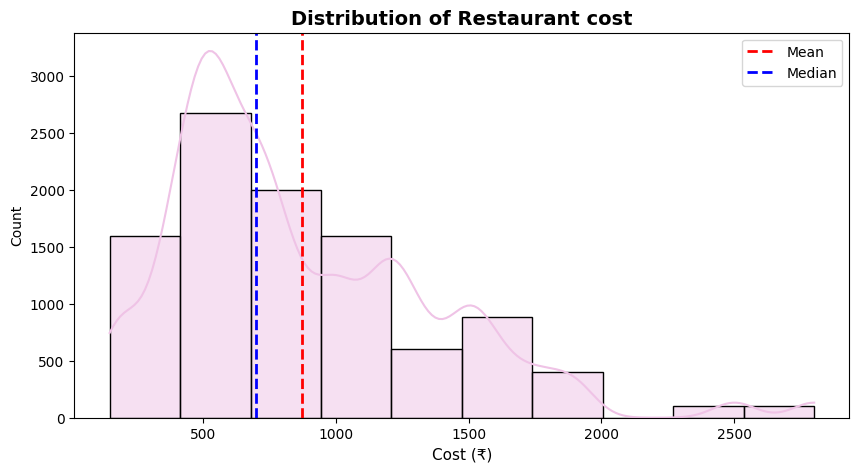

Average Restaurant Cost= 871.7780010045203
Median Restaurant Cost= 700.0


In [52]:
# Calculate mean and median cost
avg_cost = merged_df['Cost'].mean()
median_cost = merged_df['Cost'].median()

# Plot the histogram chart
plt.figure(figsize= (10, 5))
sns.histplot(data= merged_df, x='Cost', bins= 10, kde= True, color='#efc3e6', alpha= 0.5)
plt.axvline(avg_cost, color='red', linestyle='--', linewidth= 2, label='Mean')
plt.axvline(median_cost, color='blue', linestyle='--', linewidth= 2, label='Median')

# Set chart title and axis labels
plt.title('Distribution of Restaurant cost', size= 14, weight='bold')
plt.xlabel('Cost (₹)', size= 11)
plt.legend()

plt.show()

print(f"\033[1mAverage Restaurant Cost=\033[0m \033[32m{avg_cost}\033[0m")
print(f"\033[1mMedian Restaurant Cost=\033[0m \033[32m{median_cost}\033[0m")

##### 1. Why did you pick the specific chart?

The histogram was chosen for the visualization because it is suitable for visualizing the distribution of numeric data, helping to understand the frequency and pattern of restaurant costs. The inclusion of a kernel density estimate provides a smoothed representation for additional insights.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The right-skewed distribution of costs shows that restaurant costs range from ₹200 to ₹2000. However, two outliers with significantly higher costs (more than ₹2300) likely represent premium or luxury restaurants.

- Despite the skew, the average restaurant cost (mean) is approximately ₹872, while the median cost is ₹700. Additionally, the distribution leans towards the ₹500 to ₹800 range, suggesting a significant presence of affordable restaurants.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

- Restaurants can target high-spending customers by promoting premium dining experiences, while simultaneously attracting budget-conscious customers with value deals and highlighting affordable options within the ₹500 - ₹800 range.

- By understanding the dominant cost range (₹500 - ₹800) restaurants can optimize menu pricing strategies to cater expectations of affordable customers segment. They can ensure their offerings remain competitive within this range while maintaining profitability.

Are there any insights that lead to negative growth? Justify with specific reason.

Pricing strategies should consider local economic conditions. Promote expensive cuisines through targeted marketing to high-paying customers. However, it's also crucial to cater to budget-conscious customers as well, as neglecting this large segment could negatively impact the business.

#### **Chart - 3 (Trend of Average Rating over time)**

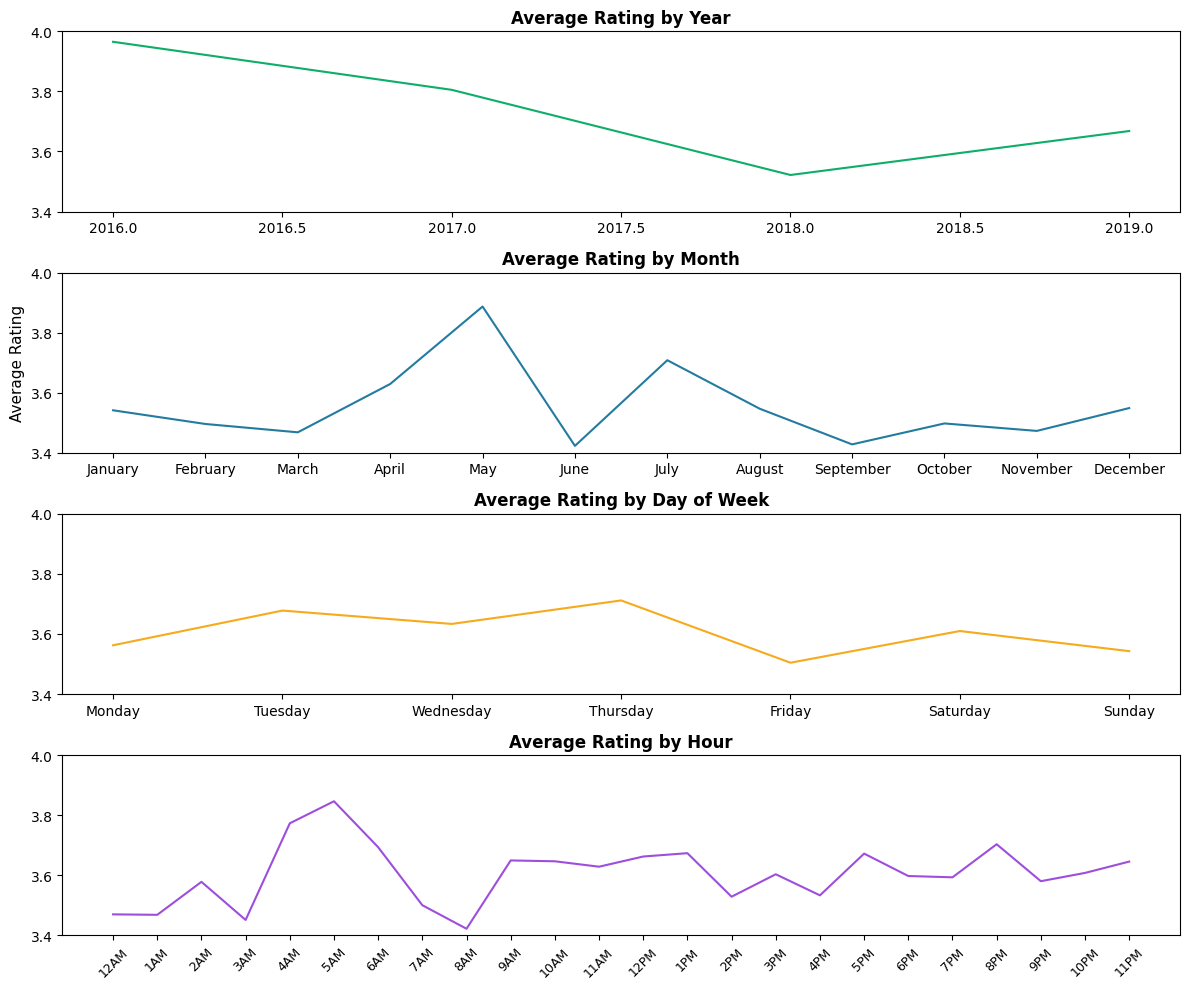

In [53]:
# Calculate average rating by year
average_rating_by_year = merged_df.groupby('Year')['Rating'].mean()

# Calculate average rating by month
average_rating_by_month = merged_df.groupby('Month')['Rating'].mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

# Add 'DayOfWeek' column to the dataframe
merged_df["DayOfWeek"] = merged_df["Time"].dt.day_name()

# Calculate average rating by day of the week
average_rating_by_dow = merged_df.groupby('DayOfWeek')['Rating'].mean()
weekly_avg_rating = merged_df.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Calculate average rating by hour
average_rating_by_hour = merged_df.groupby('Hour')['Rating'].mean()

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# Plot for average rating by year
axes[0].plot(average_rating_by_year, color='#0ead69')
axes[0].set_title('Average Rating by Year', size= 12, weight='bold')
axes[0].set_ylim(3.4, 4.0)

# Plot for average rating by month
axes[1].plot(average_rating_by_month, color='#247ba0')
axes[1].set_title('Average Rating by Month', size= 12, weight='bold')
axes[1].set_ylabel('Average Rating', size= 11)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(months, size= 10)
axes[1].set_ylim(3.4, 4.0)

# Plot for average rating by day of week
axes[2].plot(weekly_avg_rating, color='#f6aa1c')
axes[2].set_title('Average Rating by Day of Week', size= 12, weight='bold')
axes[2].set_ylim(3.4, 4.0)

# Plot for average rating by hour
axes[3].plot(average_rating_by_hour, color='#9d4edd')
axes[3].set_title('Average Rating by Hour', size= 12, weight='bold')
axes[3].set_ylim(3.4, 4.0)
plt.xticks(average_rating_by_hour.index,
        labels = [f'{hour % 12 if hour % 12 != 0 else 12}{"AM" if hour < 12 else "PM"}'
           for hour in range(24)], size= 9, rotation= 45)

plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

A line plot was chosen for this visualization because it effectively shows the trend of average ratings over time. A line plot is suitable for showing the progression of a numeric variable (Rating) across a continuous axis(Years, Months, Days and Hours).

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The yearly trend shows that restaurants initially started with an average rating of 3.9, which gradually decreased over time until 2018. After 2018, the ratings began to increase.

- The monthly trend for ratings shows constant moderate ratings in the range of 3.5 to 3.6 from January to March and July to December. A major spike can be observed in May, where the average rating is 3.9, and a significant fall in June, where the rating is 3.4.

- The daily trend shows constant moderate ratings from Monday to Thursday within the range of 3.5 to 3.6. Average ratings fall below 3.5 on Friday and then start increasing on Saturday and Sunday.

- The hourly trend shows the highest rating of approximately 3.8 at 5 AM and a rating of 3.7 at 8 PM. In contrast, the lowest average rating of 3.4 is observed at 3 AM and 8 AM.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- By understanding the hourly and daily trends, restaurants can optimize staffing and inventory levels to ensure high service quality during peak times and manage costs during slower periods.

- Knowing the monthly trends allows restaurants to plan seasonal promotions or special events to boost ratings during low periods and capitalize on high-rating months.

- Understanding yearly trends helps in adjusting marketing strategies to address the reasons behind the ratings decrease until 2018 and reinforce the factors contributing to the post-2018 increase.

Are there any insights that lead to negative growth? Justify with specific reason.

If restaurants do not address the reasons behind low ratings during specific months, days or hours, it could lead to persistent dissatisfaction among customers and ultimately harm the business.


#### **Chart - 4 (Top 10 Most Expensive and Least Expensive Restaurants)**

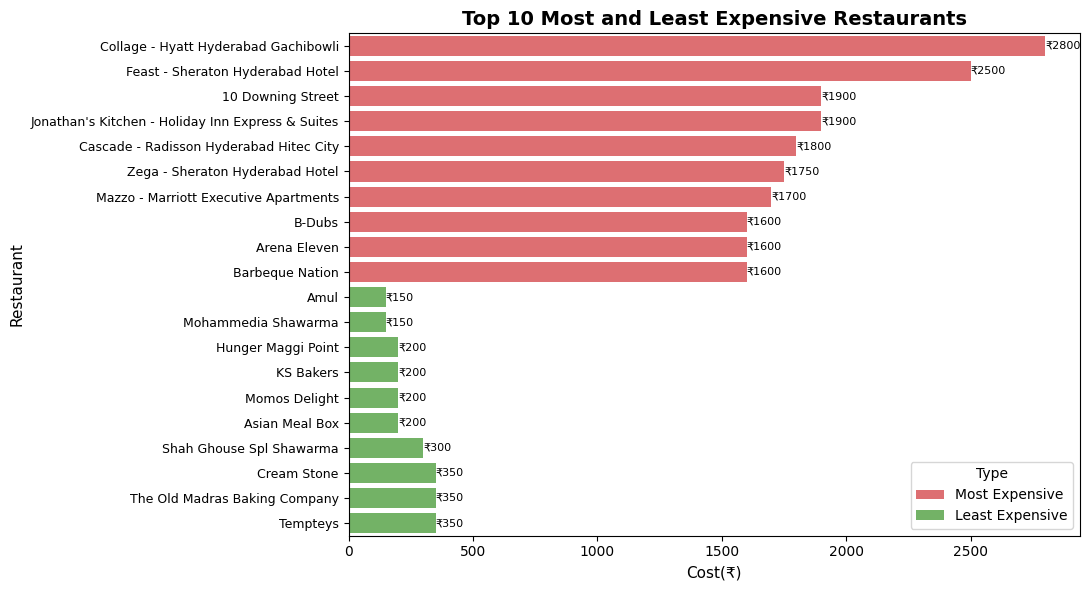

In [54]:
# Group by 'Restaurant' and calculate the mean 'Cost' for each restaurant
cost_by_restaurant = merged_df.groupby('Restaurant', as_index= False)['Cost'].mean()

# Sort the dataframe by 'Cost' in descending order to get top 10 most expensive restaurants
most_expensive = cost_by_restaurant.sort_values(by='Cost', ascending= False).head(10)
most_expensive['Type'] = 'Most Expensive'

# Sort the dataframe by 'Cost' in ascending order to get top 10 least expensive restaurants
least_expensive = cost_by_restaurant.sort_values(by='Cost').head(10)
least_expensive['Type'] = 'Least Expensive'

# Concatenate the two dataframes
combined = pd.concat([most_expensive, least_expensive])

# Create the plot
plt.figure(figsize=(11, 6))
bars = sns.barplot(data= combined, x='Cost', y='Restaurant', hue='Type', dodge= False,
                   palette= ['#ef5d60', '#6bbf59'])

# Set chart title and axis labels
plt.title('Top 10 Most and Least Expensive Restaurants', size= 14, weight='bold')
plt.xlabel('Cost(₹)', size= 11)
plt.ylabel('Restaurant', size= 11)
plt.yticks(size= 9)

# Add annotations next to each bar
for i, (cost, restaurant, typ) in enumerate(zip(combined['Cost'], combined['Restaurant'], combined['Type'])):
    plt.text(cost + 0.2, i, f'₹{cost:.0f}', size=8, va='center', ha='left')

plt.legend(title='Type', loc='lower right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because of its effectiveness of easily comparing a categorical variable (Restaurant) against a numerical variable (cost), where bars lengths directly corresponds to the cost, aiding quick visual assessment of most expensive and least expensive restaurants.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- Collage - Hyatt Hyderabad Gachibowli and Feast - Sheraton Hyderabad Hotel have the highest average cost of more than ₹2500, followed by 10 Downing Street and Jonathan's Kitchen - Holiday Inn Express and Suites, with an average of ₹1900.

- B-Dubs, Arena Eleven and Barbeque Nation have a slightly higher cost of ₹1600 than the average cost.

- Shah Ghouse Special Shawarma, Cream Stone, The Old Madras Baking Company and Tempteys have an affordable cost range between ₹300 and ₹350.

- Amul, Mohammedia Shawarma, Hunger Maggi Point, KS Bakers, Momos Delight and Asian Meal Box have a base price range of ₹150 to ₹200.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Understanding the cost distribution helps restaurants optimize their pricing strategies to cater to different customer segments. For example, restaurants can ensure their offerings are competitive within the affordable range of ₹300 to ₹350 while also providing premium options for high-paying customers.

- The insights can help in segmenting customers based on their spending habits. Restaurants can tailor their marketing efforts to attract budget-conscious customers as well as those seeking premium dining experiences.



Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights that indicate negative growth. However, while focusing on high paying customer who seeks premium expreience it also necessay to pay attention on including low priced items in menu to match the preferences of customers who demand affordability.

#### **Chart - 5 (Top Reviewers Based on Reviews)**

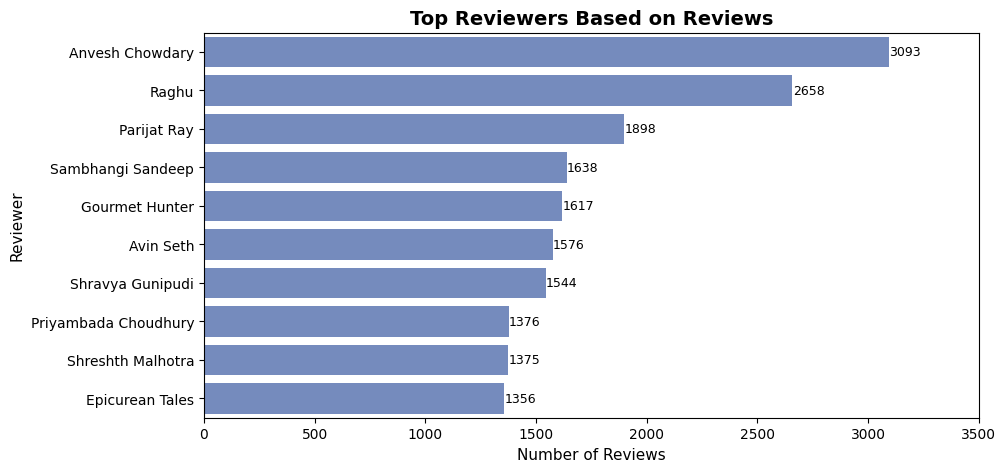

In [55]:
# Group by 'Reviewer' and calculate the sum of 'Reviews'
top_reviewers_reviews = merged_df.groupby('Reviewer')['Reviews'].sum()
top_reviewers_reviews = top_reviewers_reviews.sort_values(ascending= False).head(10)

# Plotting top reviewers based on reviews
plt.figure(figsize= (10, 5))
bars = sns.barplot(x= top_reviewers_reviews.values, y= top_reviewers_reviews.index, color='#6987c9')

# Set chart title and axis labels
plt.title('Top Reviewers Based on Reviews', size= 14, weight='bold')
plt.xlabel('Number of Reviews', size= 11)
plt.ylabel('Reviewer', size= 11)
plt.xlim(0, 3500)

# Add annotations next to each bar
for bar, reviews in zip(bars.patches, top_reviewers_reviews):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{reviews:.0f}', size= 9, ha='left', va='center')

plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because of its effectiveness of easily comparing a categorical variable (Reviewers) against a numerical variable (Number of Reviews), where bars lengths directly corresponds to the Number of Reviews, aiding quick visual assessment of top reviewers.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- Anvesh Chowdary and Raghu stand out with more than 2500 reviews each, followed by Parijat Ray and Sambhangi Sandeep, who have given reviews in the range of 1600 to approximately 1900.

- Priyambda Choudhary, Shresth Malhotra, and Epicurean Tales have posted a significant number of reviews, close to the range of 1300.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Understanding that certain reviewers are highly active can help businesses target these influencers for promotional activities, potentially boosting visibility and attracting more customers.

- Showcasing positive reviews as testimonials can significantly enhance customer engagement and increase conversion rates. Potential customers often rely on reviews and testimonials to gauge the reputation and quality of a business. By highlighting positive feedback, restaurants can build trust, demonstrate customer satisfaction and influence potential customers to choose their services.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no clear insights suggesting negative growth from the analysis. However, it's important to consider potential downsides and utilize the insights with caution.



#### **Chart - 6 (Distribution of Ratings across Restaurants)**

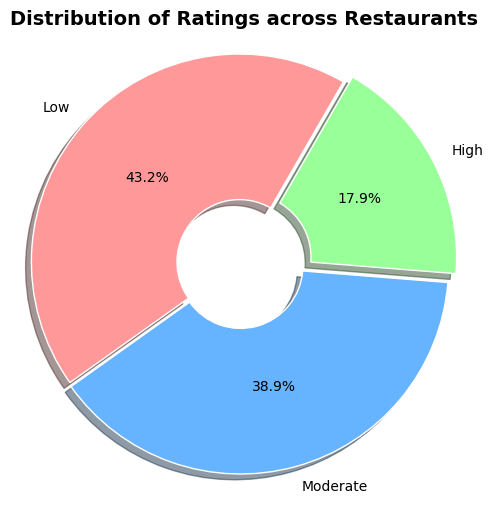

In [56]:
# Calculate average rating for each restaurant
restaurant_mean_ratings = merged_df.groupby("Restaurant")["Rating"].mean()

def assign_rating_category(avg_rating):
  if avg_rating >= 4.0:
      return "High_Rated"
  elif avg_rating >= 3.5:
      return "Moderate_Rated"
  else:
      return "Low_Rated"

# Create a new column "Rating_Category" based on the average rating
merged_df['Rating_Category'] = merged_df["Restaurant"].map(restaurant_mean_ratings).apply(assign_rating_category)

rating_category_counts = merged_df['Rating_Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
labels= ['Low', 'Moderate', 'High']
plt.pie(rating_category_counts, labels= labels, autopct='%1.1f%%', explode= (0, 0.02, 0.05), shadow= True,
        startangle= 60, wedgeprops= dict(width= 0.7, edgecolor='w'), colors= ['#ff9999','#66b3ff','#99ff99'])

# Set chart title and axis labels
plt.title('Distribution of Ratings across Restaurants', size= 14, weight='bold')
plt.axis('equal')

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen for this visualization because it effectively displays the proportional breakdown of ratings in the review data. The 'donut' effect provides a clean and visually appealing representation, making it easy to observe the proportions of High, moderate and low ratings.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The chart shows that a large proportion of restaurants, around 43.2%, have low ratings. Moderately rated restaurants make up roughly 39%, and only 18% of restaurants have high ratings.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- By identifying the top-performing restaurants, businesses can learn and replicate best practices to improve overall customer satisfaction and increase ratings.

- Restaurants with moderate ratings have the potential for improvement. By analyzing customer feedback, they can address specific issues and enhance customer experience.

- Understanding customer preferences, including budget-friendly cuisines and menu options that match the needs of cost-conscious customers, while maintaining quality, can improve ratings and customer satisfaction.

Are there any insights that lead to negative growth? Justify with specific reason.

Without addressing the specific reasons behind low ratings, businesses might miss out on critical areas (such as Food quality and staff behavior) that need improvement, which could negatively impact overall growth and reputation.

#### **Chart - 7 (Multivariate Analysis of Top 10: Cuisines, Collections, Reviewers, Restaurants)**

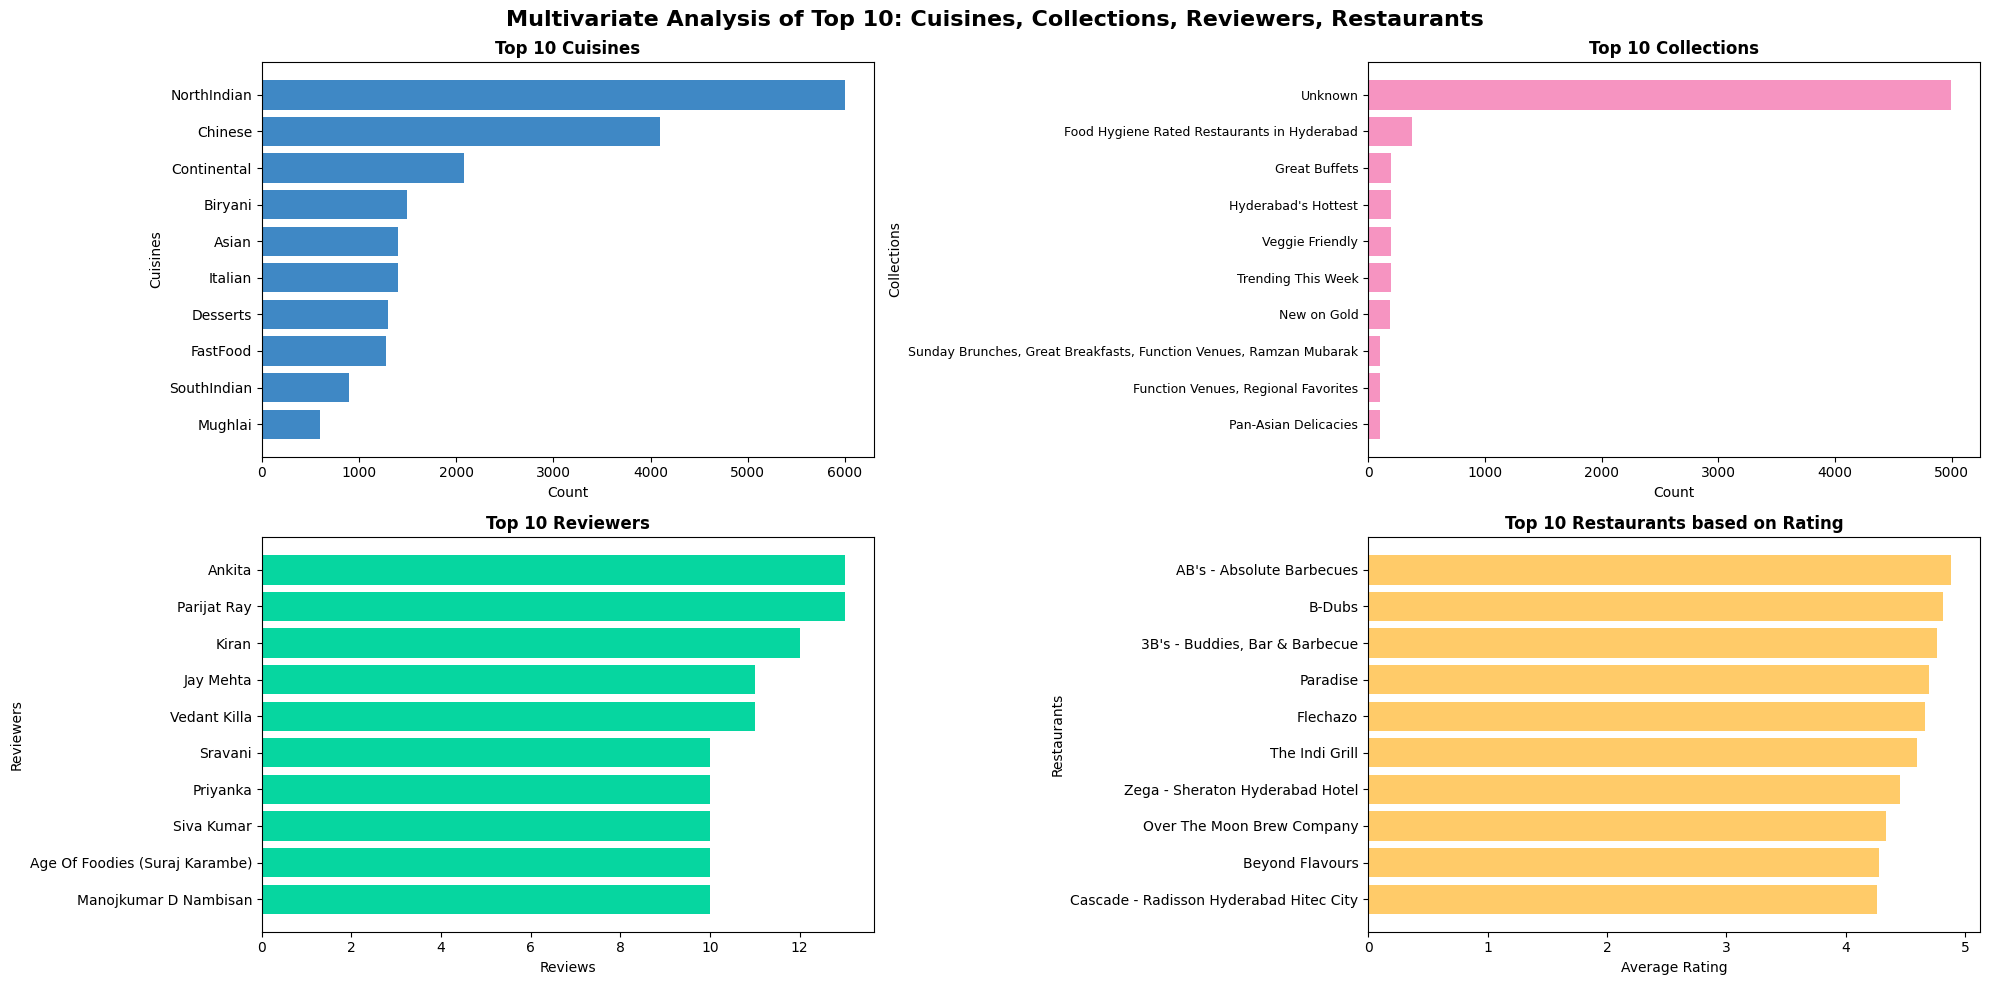

In [57]:
cuisines_exploded = merged_df.explode('Cuisines')
top10_cuisines = cuisines_exploded['Cuisines'].value_counts().head(10)  # Top 10 Cuisines
top10_collections = merged_df['Collections'].value_counts().head(10)  # Top 10 Collections
top10_reviewers = merged_df['Reviewer'].value_counts().head(10)  # Top 10 Reviewers

# Top 10 Restaurants based on ratings
top10_rated_restaurants = merged_df.groupby('Restaurant')['Rating'].mean().sort_values(ascending= False).head(10)

# 1. Plot top 10 cuisines
plt.figure(figsize= (20, 10))
plt.suptitle("Multivariate Analysis of Top 10: Cuisines, Collections, Reviewers, Restaurants", size= 16, weight='bold')
plt.subplot(2, 2, 1)
plt.barh(top10_cuisines.index, top10_cuisines, color= '#3f88c5')
plt.title('Top 10 Cuisines', size= 12, weight='bold')
plt.xlabel('Count', size= 10)
plt.ylabel('Cuisines', size= 10)
plt.gca().invert_yaxis()

# 2. Plot top 10 collections
plt.subplot(2, 2, 2)
plt.barh(top10_collections.index, top10_collections, color='#f694c1')
plt.title('Top 10 Collections', size= 12, weight='bold')
plt.xlabel('Count', size= 10)
plt.ylabel('Collections', size= 10)
plt.yticks(size= 9)
plt.gca().invert_yaxis()

# 3. Plot top 10 reviewers
plt.subplot(2, 2, 3)
plt.barh(top10_reviewers.index, top10_reviewers, color='#06d6a0')
plt.title('Top 10 Reviewers', size= 12, weight='bold')
plt.xlabel('Reviews', size= 10)
plt.ylabel('Reviewers', size= 10)
plt.gca().invert_yaxis()

# 4. Plot top 10 restaurants based on ratings
plt.subplot(2, 2, 4)
plt.barh(top10_rated_restaurants.index, top10_rated_restaurants, color='#ffcb69')
plt.title('Top 10 Restaurants based on Rating', size= 12, weight='bold')
plt.xlabel('Average Rating', size= 10)
plt.ylabel('Restaurants', size= 10)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

A four-subplot bar chart, is ideal for this scenario because it effectively displays multiple independent analyses (top 10 cuisines, collections, reviewers, and restaurants) within a single visualization. Each subplot uses horizontal bar charts, allowing for clear comparisons within each category (cuisines vs. cuisine count, reviewers vs. reviews etc.)  Inverting the y-axis ensures labels are readable and avoids overlapping bars in subplots with many entries.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- Top 10 Cuisines: North Indian, Chinese and Continental being the most preffered cuisine among customers. while, Fast Food, South Indian and Mughlai has less popularity in top 10 cuisines.

- Top 10 Collections: Since, the collections were missing for majority of restaurants, indicating a lack of specific categorization. "Food Hygiene Rated Restaurants in Hyderabad" and several other collections have fewer instances.

- Top 10 Reviewers: Ankita and Parijat Ray are the top reviewers with 13 reviews each, followed by Kiran with 12 reviews. The chart shows a relatively diverse group of reviewers contributing varying numbers of reviews.

- Top 10 Restaurants based on Rating: AB's - Absolute Barbecues is the highest-rated restaurant with an average rating of 4.8. Other top-rated restaurants include B-Dubs, 3B's - Buddies, Bar & Barbecue, Paradise and Flechazu.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Knowing that North Indian, Chinese cuisines are the most preferred can help restaurants focus on these popular choices to attract more customers and enhance menu offerings.

- Identifying top reviewers (Ankita, Parijat Ray, Kiran) presents opportunities for collaboration or targeted promotions to incentivize continued engagement and potentially attract new customers through their reviews.

- If some collections have a significant presence (e.g., "Food Hygiene Rated Restaurants"), highlighting these in marketing materials can attract customers who value specific certifications.

- Analyzing highly-rated restaurants (AB's, B-Dubs, etc.) can reveal best practices in customer service, food quality, or ambiance that others can adopt to improve their ratings.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- While focusing on popular cuisines is important, ignoring less popular ones (Fast Food, South Indian, Mughlai) might miss out on potential customers who prefer those options.

- While focusing on popular cuisines is important, ignoring less popular ones (Fast Food, South Indian, Mughlai) might miss out on potential customers who prefer those options. Consider offering special promotions or highlighting unique dishes to attract them.

#### **Chart - 8 (Common Words Used in Reviews)**

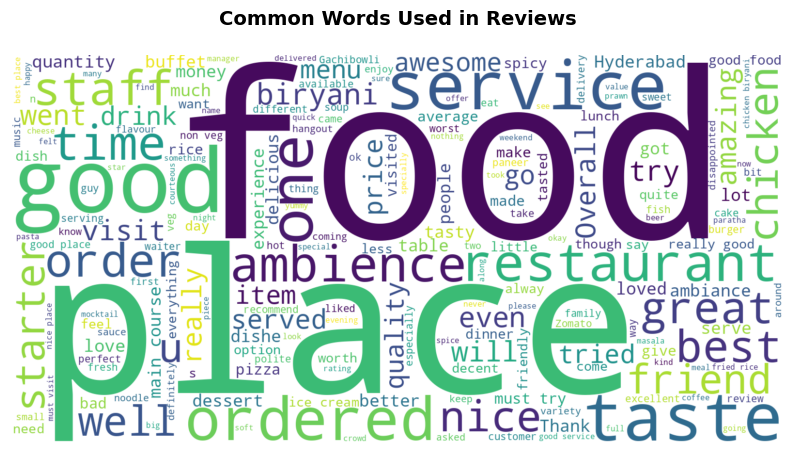

In [58]:
# Extract common words in reviews
common_words_in_reviews = ' '.join(merged_df['Review'].tolist())

# Generate word cloud
wordcloud = WordCloud(width= 1600, height= 800, background_color='white').generate(common_words_in_reviews)
plt.figure(figsize= (10, 6))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Words Used in Reviews\n', size= 14, weight='bold')
plt.axis('off')

plt.show()

##### 1. Why did you pick the specific chart?

A word cloud was chosen to visualize the most common words used in reviews because it effectively displays the relative frequency of words in a visual and intuitive manner. The size of each word in the cloud represents its frequency or importance.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the wordcloud are as follows as:

- Positive Sentiments: The presence of words such as 'good', 'nice', 'best', 'love', 'liked', 'happy', 'well', 'perfect', 'great' and 'amazing' indicates that customers generally have positive experiences and feelings towards the restaurants.

- Customer Satisfaction: Words like 'yummy', 'food', 'quick', 'delicious', 'fresh', 'taste', 'recommend', 'friendly', 'quality', 'enjoy' and 'sweet' suggest high customer satisfaction, emphasizing the quality and enjoyment of the food and service.

- Restaurant Environment: The presence of words such as 'place', 'ambience', 'visited', 'menu', 'table', 'waiter', 'service',  'good place' and 'staff' indicates that customers often comment on the restaurant's environment, service quality, and overall experience.

- Customer Concerns: Specific words such as 'bad', 'small', 'money', 'disappointed', 'decent', 'never', 'price' and 'worst' highlight areas of concern or dissatisfaction that customers have, pointing to issues that need to be addressed.

- Popular Food Items: Words like 'biryani', 'ice-cream', 'chicken', 'starter', 'paneer', 'soup', 'fish', 'noodle', 'non-veg' and 'dessert' suggest that these are commonly ordered items, indicating their popularity among customers.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- By identifying positive sentiments like 'good', 'nice', 'best' and 'great', businesses can understand what aspects of their service and food customers appreciate the most. This knowledge can guide efforts to enhance these aspects further, thereby improving overall customer satisfaction.

- Understanding words such as 'friendly', 'quick', 'delicious' and 'quality' indicates where the restaurant excels. Focusing on maintaining these standards can lead to repeat business and positive word of mouth recommendations.

- Insights into popular food items such as 'biryani', 'chicken' and 'ice-cream' can help in optimizing the menu. Highlighting and improving these popular dishes can attract more customers and increase sales.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- Words like 'disappointed', 'bad', 'worst' and mentions of issues related to 'price' and 'small' suggest areas where customers are dissatisfied. Ignoring or failing to address these concerns could lead to negative reviews, reduced customer retention and potentially lower revenues.

- Specific mentions of 'never' or 'decent' might indicate areas where expectations are not being met consistently. Addressing these issues through improvements in service, pricing strategies, or menu adjustments could prevent negative growth and improve overall business performance.

#### **Chart - 9 (Avearge per Person Cost on Cuisines)**

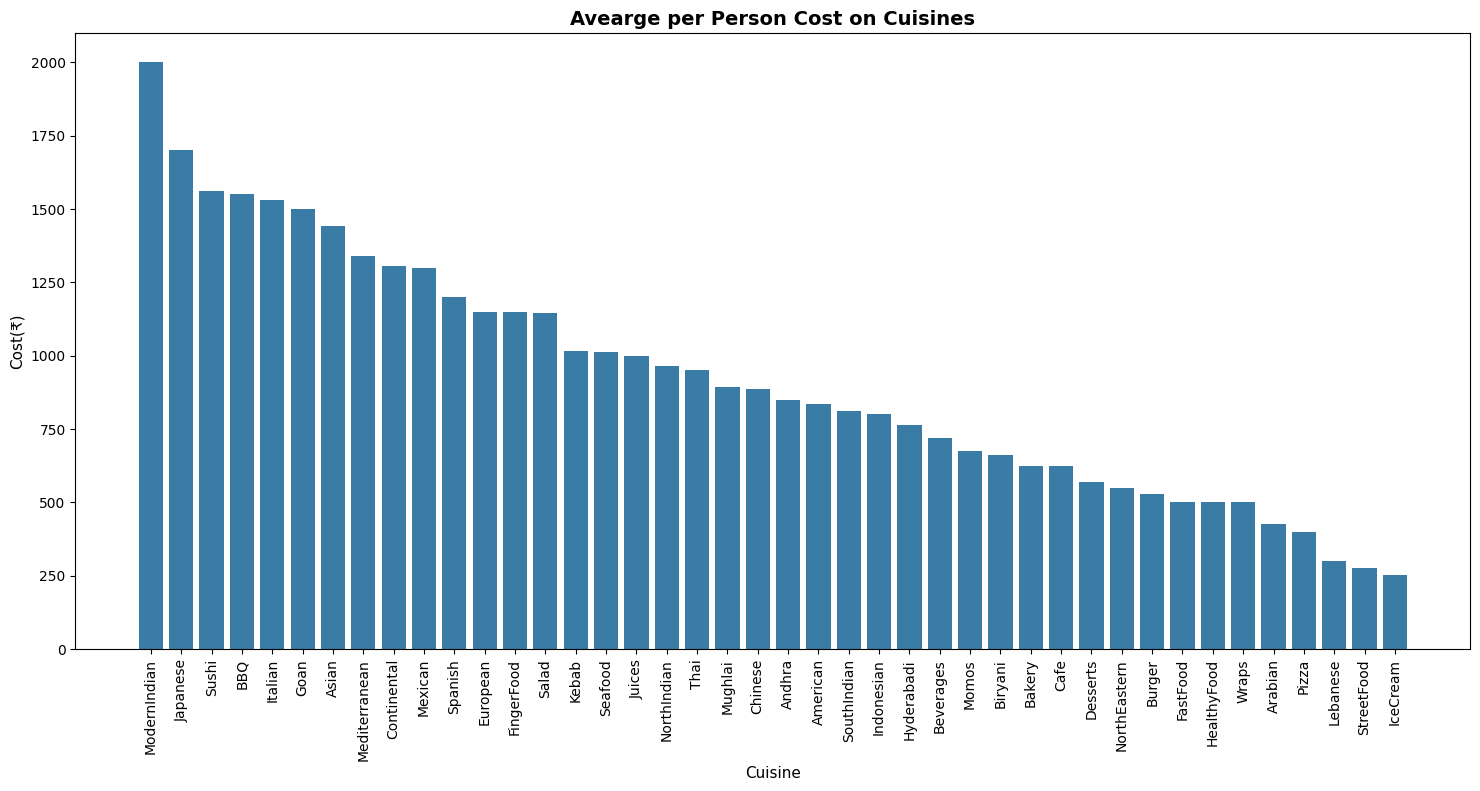

In [59]:
# Calculate average cost for cuisines
avg_cost_per_cuisine = cuisines_exploded.groupby('Cuisines')['Cost'].mean().sort_values(ascending= False)

# Plot the chart
plt.figure(figsize= (18, 8))
plt.bar(avg_cost_per_cuisine.index, avg_cost_per_cuisine, color='#3a7ca5')
plt.title('Avearge per Person Cost on Cuisines', size= 14, weight='bold')

# Set chart title and axis labels
plt.xlabel('Cuisine', size= 11)
plt.ylabel('Cost(₹)', size= 11)
plt.xticks(rotation= 90)

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to represent the average per person cost on cuisines because it allows for a clear comparison of average cost across different cuisines. The height of each bar is corresponds to the average cost associated with them.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The analysis signifies the presence of a diverse range of cuisines, ranging from premium options to more affordable ones

- Modern Indian has the highest cost at around ₹2000, followed by Japanese at ₹1700.

- Cuisines like Sushi, BBQ, Italian, and Goan fall in the range of ₹1500 to ₹1600, which is not extremely premium but still above the affordable range for the majority of customers.

- Cuisines such as Arabian, Pizza, Lebanese, Street Food, and Ice Cream offer more affordable options, typically ranging from ₹250 to ₹400.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Understanding the range from premium to affordable cuisines allows restaurants to strategically position their offerings. They can cater to different customer segments by adjusting pricing strategies and menu compositions accordingly.

- Highlighting premium options like Modern Indian or Japanese can attract higher-spending customers, while ensuring a variety of affordable options like Arabian or Street Food can appeal to a broader audience.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, it's crucial for restaurants to maintain a balance in their menu offerings to cater to a wide spectrum of customers and sustain positive growth over time. This balance ensures inclusivity and broader customer satisfaction, minimizing the risk of negative impact on business growth.

#### **Chart - 10 (Frequent Words Used for Most and Least Expensive Restaurants)**

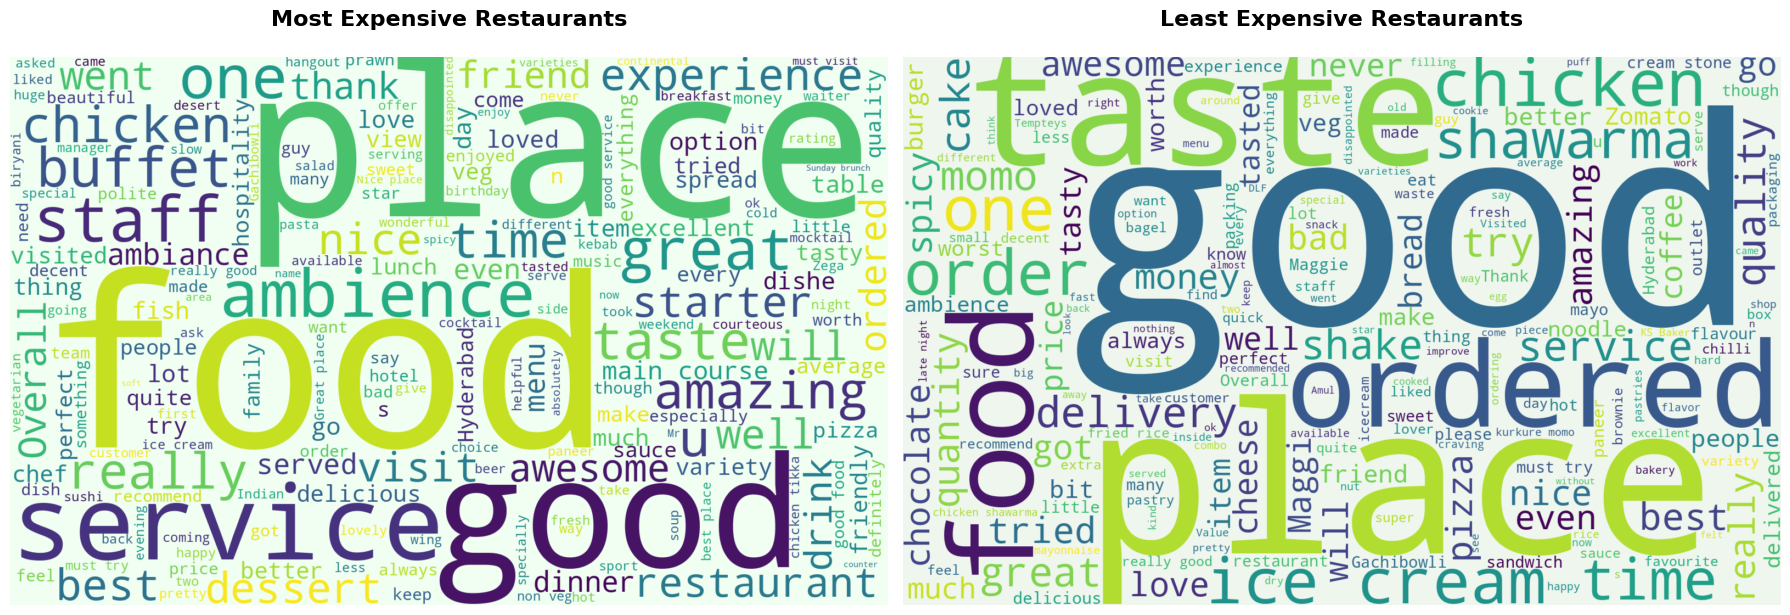

In [60]:
# Filter the most expensive and least expensive restaurants
most_expensive_restaurants = most_expensive['Restaurant']
least_expensive_restaurants = least_expensive['Restaurant']

# Extract reviews for the most expensive restaurants
most_expensive_reviews = merged_df[merged_df['Restaurant'].isin(most_expensive_restaurants)] \
              ['Review'].dropna().tolist()
least_expensive_reviews = merged_df[merged_df['Restaurant'].isin(least_expensive_restaurants)] \
              ['Review'].dropna().tolist()

# Combine all reviews into one string
most_expensive_reviews_text = ' '.join(most_expensive_reviews)
least_expensive_reviews_text = ' '.join(least_expensive_reviews)

# Generate word cloud for most expensive restaurants
most_expensive_wordcloud = WordCloud(width= 1600, height= 1000, background_color='#f0fff1') \
              .generate(most_expensive_reviews_text)

# Generate word cloud for least expensive restaurants
least_expensive_wordcloud = WordCloud(width= 1600, height= 1000, background_color='#eff6ee') \
              .generate(least_expensive_reviews_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize= (18, 12))

# Most expensive restaurants word cloud
axes[0].imshow(most_expensive_wordcloud, interpolation='bilinear')
axes[0].set_title('Most Expensive Restaurants\n', size=16, weight='bold')
axes[0].axis('off')

# Least expensive restaurants word cloud
axes[1].imshow(least_expensive_wordcloud, interpolation='bilinear')
axes[1].set_title('Least Expensive Restaurants\n', size=16, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A subplot of word clouds was chosen to visualize the Frequent Words Used for Most and Least Expensive Restaurants because it effectively displays the relative frequency of words in a visual and intuitive manner. The size of each word in the cloud represents its frequency or importance.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the wordclouds are as follows as:

**--> Most Expensive Restaurants:**

- Positive Sentiments: Words such as 'good', 'nice', 'best', 'loved', 'well', 'great' and 'amazing' indicate positive customer experiences at these high-end restaurants.

- Occasions: Words like 'people', 'family', 'friends', 'birthday', 'dinner', 'night' suggest that customers often visit these restaurants for special occasions or gatherings.

- Restaurant Environment: Words like 'place', 'music', 'beautiful', 'hospitality', 'polite', 'friendly', 'chef', 'ambience', 'waiter', 'service', 'good place' and 'staff' suggest customers appreciate the special treatment and high-quality dining experiences offered.

- Customer Concerns: Specific words such as 'less', 'bad', 'bit', 'decent' and 'price' highlight areas where customers may have concerns or dissatisfaction, possibly related to perceived value or minor issues.

- Popular Food Items: Words like 'pasta', 'biryani', 'beer', 'main course', chicken', 'soup' and 'dessert' indicate these items are frequently ordered, reflecting their popularity among high.

**--> Least Expensive Restaurants:**

- Positive Sentiments: The presence of words such as 'good', 'best', 'awesome', 'love', 'happy', 'well', 'perfect', 'great', 'excellent' and 'amazing' indicates that customers generally have positive experiences at these affordable restaurants.

- Experience and Value: Words like 'must try', 'shop',  'experience', 'value', 'much', 'varieties' and 'visit' suggest that customers appreciate the affordability and diverse menu options available.

- Customer Concerns:  Words such as 'less', 'bad', 'old', and 'price', highlighting areas where customers express concerns or dissatisfaction, possibly related to price-to-quality perceptions.

- Popular Food Items: Words such as 'pizza', 'shake', 'chocolate', 'bread', 'cheese',  'ice-cream', 'sandwich', 'noodle', 'momo', 'maggie', 'coffee', 'chicken' and 'dessert' indicate these are commonly ordered items, reflecting their popularity among customers who seek affordability.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Understanding positive sentiments such as 'good', 'best', 'great', and 'amazing' helps restaurants reinforce aspects of their service and menu that customers appreciate, thereby enhancing overall customer satisfaction.

- Identifying popular food items like 'pizza', 'ice-cream' and 'chicken' allows restaurants to prioritize and possibly expand offerings that are in high demand, potentially increasing sales and customer retention.

- Recognizing customer appreciation for 'ambience', 'hospitality', 'service', and 'staff' provides insights into areas where restaurants excel, allowing them to maintain and further improve these aspects to attract more customers.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- Words indicating customer concerns such as 'less', 'bad', 'old', 'decent' and 'price' highlight areas where improvements are needed. Addressing these concerns promptly can prevent negative reviews and customer dissatisfaction from impacting the restaurant's reputation and growth for long run.

#### **Chart - 11 (Top Reviewers Based on Followers)**

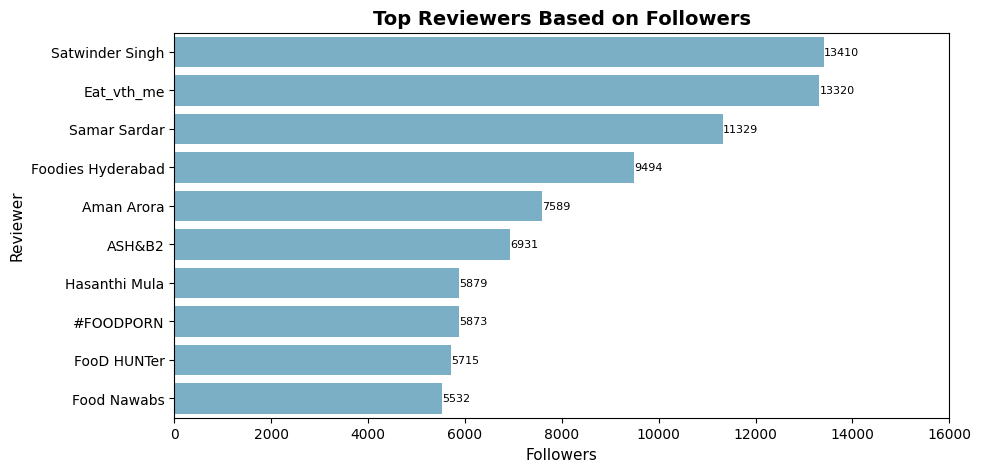

In [61]:
# Group by 'Reviewer' and calculate the sum of 'Followers'
top_reviewers_followers = merged_df.groupby('Reviewer')['Followers'].mean()
top_reviewers_followers = top_reviewers_followers.sort_values(ascending= False).head(10)

# Plotting top reviewers based on followers
plt.figure(figsize= (10, 5))
bars = sns.barplot(x= top_reviewers_followers.values, y= top_reviewers_followers.index, color='#6eb4d1')
plt.title('Top Reviewers Based on Followers', size= 14, weight='bold')
plt.xlabel('Followers', size= 11)
plt.ylabel('Reviewer', size= 11)
plt.xlim(0, 16000)

# Add annotations next to each bar
for bar, followers in zip(bars.patches, top_reviewers_followers.values):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{followers:.0f}', size= 8, ha='left', va='center')

plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because of its effectiveness of easily comparing a categorical variable (Reviewers) against a numerical variable (Number of Followers), where bars lengths directly corresponds to the Number of followers, aiding quick visual assessment of top reviewers.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The reviewers Satwinder Singh, Eat_vth_me, and Samar Sardar each have more than 10,000 followers.

- Hasanthi Mula, FoodPorn, Food Hunter, and Food Nawab have followers in the range of 5,500 to 5,900.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Reviewers with a large follower base can significantly influence customer choices. Restaurants can collaborate with top reviewers like Satwinder Singh, Eat_vth_me, and Samar Sardar to promote their offerings and attract more customers.

- By recognizing popular reviewers, businesses can offer special promotions or incentives to these influencers, further encouraging them to post positive reviews and increase restaurant visibility.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, there are also some potential negative implications of the insights that need to be addressed:

- Focusing solely on influencer reviews might cause restaurants to overlook genuine feedback from regular customers. This could lead to missed opportunities for improvement and overall customer satisfaction.

- The key is to balance influencer engagement with genuine customer feedback to ensure sustainable and positive business growth.

#### **Chart - 12 (Impact of Pictures on Ratings)**

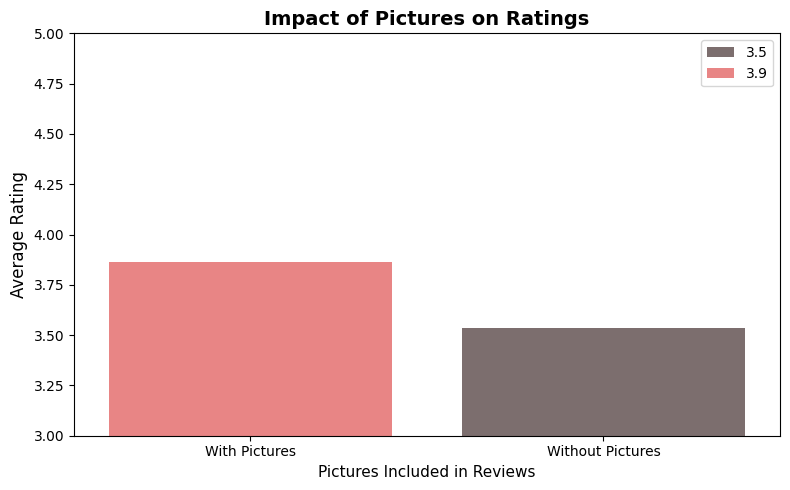

In [62]:
# Calculate average rating with pictures and without pictures
avg_rating_with_pictures = merged_df[merged_df['Pictures'] > 0]['Rating'].mean()
avg_rating_without_pictures = merged_df[merged_df['Pictures'] == 0]['Rating'].mean()

# Plot bar graph
plt.figure(figsize= (8, 5))
colors= ['#7e6c6c', '#f87575']
sns.barplot(x= ['With Pictures', 'Without Pictures'], y= [avg_rating_with_pictures, avg_rating_without_pictures],
            hue= [round(avg_rating_with_pictures, 1), round(avg_rating_without_pictures, 1)], palette= colors)

plt.title('Impact of Pictures on Ratings', size= 14, weight='bold')
plt.xlabel('Pictures Included in Reviews', size= 11)
plt.ylabel('Average Rating', size= 12)
plt.ylim(3, 5)
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?


A bar chart was chosen to represent the impact of pictures on ratings because it allows for a clear comparison between reviews that include pictures and those that do not.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- Reviews that include pictures have a decent average rating close to 4.0.

- Reviews that do not include pictures show a moderate rating of 3.5.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Since reviews with pictures tend to have higher ratings, restaurants can encourage customers to include pictures in their reviews by offering incentives such as discounts or loyalty points. This can improve the perceived quality of reviews and potentially attract more customers.

- Restaurants can focus on improving the visual appeal of their dishes and ambiance, knowing that these elements positively influence customer ratings when captured in pictures.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, there are also some potential negative implications of the insights that need to be addressed:

- Focusing too much on encouraging pictures might lead to neglecting other important factors such as service quality, taste, and cleanliness. It’s crucial to maintain a balance to ensure overall customer satisfaction.

#### **Chart - 13 (Correlation between Review Length and Rating)**

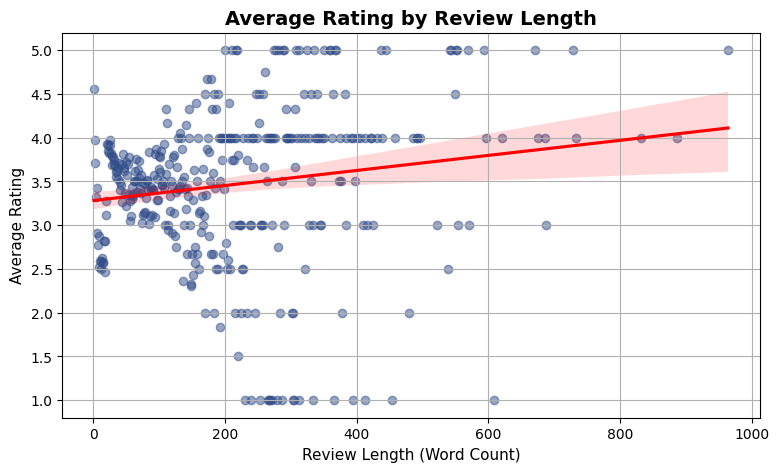

In [63]:
merged_df['Review_Length'] = merged_df['Review'].apply(lambda x: len(x.split()))
avg_rating_by_review_length = merged_df.groupby('Review_Length')['Rating'].mean()
plt.figure(figsize=(9, 5))

sns.regplot(x=avg_rating_by_review_length.index, y=avg_rating_by_review_length, \
            scatter_kws={'alpha':0.5}, line_kws= {"color":"red"}, color='#304c89')
plt.title('Average Rating by Review Length', size= 14, weight='bold')
plt.xlabel('Review Length (Word Count)', size= 11)
plt.ylabel('Average Rating', size= 11)
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

A regression plot was chosen because it effectively displays the relationship between review length and average rating. The scatter points show individual data observations, while the regression line provides a clear visual indication of the overall trend, making it easier to identify any correlation between the number of words in a review and the rating given by customers.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows as:

- The plot shows that the majority of customers prefer giving short reviews with word counts less than 200. These short reviews have an average rating of 3.5, which is a moderate rating.

- There are some outliers with review lengths between 400 to 1000 words, and these generally have ratings between 4.0 to 5.0, which are very high ratings.

- Surprisingly, reviews with word counts between 200 to 400 have ratings close to 1.0, which is a very low rating.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact in several ways:

- Understanding that the majority of reviews are short and have moderate ratings (around 3.5) can help businesses focus on improving areas that lead to such moderate feedback. By addressing common issues found in these reviews, businesses can work towards increasing customer satisfaction and potentially boosting these moderate ratings.

-  Since longer reviews tend to have higher ratings (4.0 to 5.0), businesses can encourage customers to leave more detailed feedback. Offering discounts on orders or bonus points on app for detailed reviews could help gather valuable insights while potentially increasing overall ratings.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- Reviews with word counts between 200 to 400 have significantly low ratings (around 1.0). This indicates serious issues that need to be addressed. Failing to understand and rectify the problems highlighted in these reviews could lead to persistent customer dissatisfaction and damage to the business's reputation.

#### **Chart - 14 (Correlation Heatmap)**

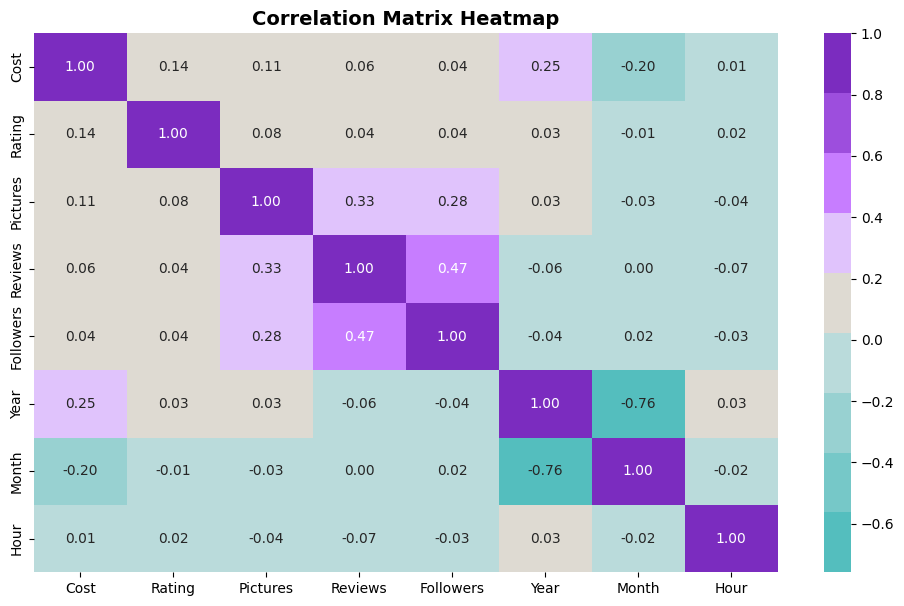

In [64]:
# Selecting numerical variables
numerical_columns = ['Cost', 'Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']
correlation_matrix = merged_df[numerical_columns].corr()

cmap = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e0c3fc", "#c77dff", "#9d4edd", "#7b2cbf"]
# Create a heatmap
plt.figure(figsize= (12, 7))
sns.heatmap(correlation_matrix, annot= True, cmap= cmap, fmt=".2f")
plt.title('Correlation Matrix Heatmap', size= 14, weight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to visualize the relationships between numerical variables('Cost', 'Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour'). The heatmap is specifically suited for analyzing the correlation coefficient between numerical variables and quantify the strength and direction of the relationships between pairs of columns.

##### 2. What is/are the insight(s) found from the chart?

The insights are drawn from the heatmap, are follows as:

- The highest correlation coefficient of 0.47 observed between Reviews and Followers suggests a weak positive correlation, indicating that the customer that has more followers has given more number of reviews.

- The correlation of 0.25 between Year and Cost indicates a weak positive correlation, suggesting that restaurant costs have increased slightly over the years.

- A very weak positive correlation of 0.08 between Rating and Pictures indicates that restaurants with more pictures tend to have slightly higher ratings, though the effect is minimal.

- A weak positive correlation of 0.33 between Reviews and Pictures suggests that restaurants with more reviews tend to also have more pictures, although this relationship is not strong.

- A weak positive correlation of 0.14 between Rating and Cost suggests that higher costs are associated with slightly better ratings, though the relationship is weak.

- A very weak negative correlation of -0.06 between Year and Reviews indicates a minimal decrease in the number of reviews over the years.

#### **Chart - 15 (Pair Plot)**

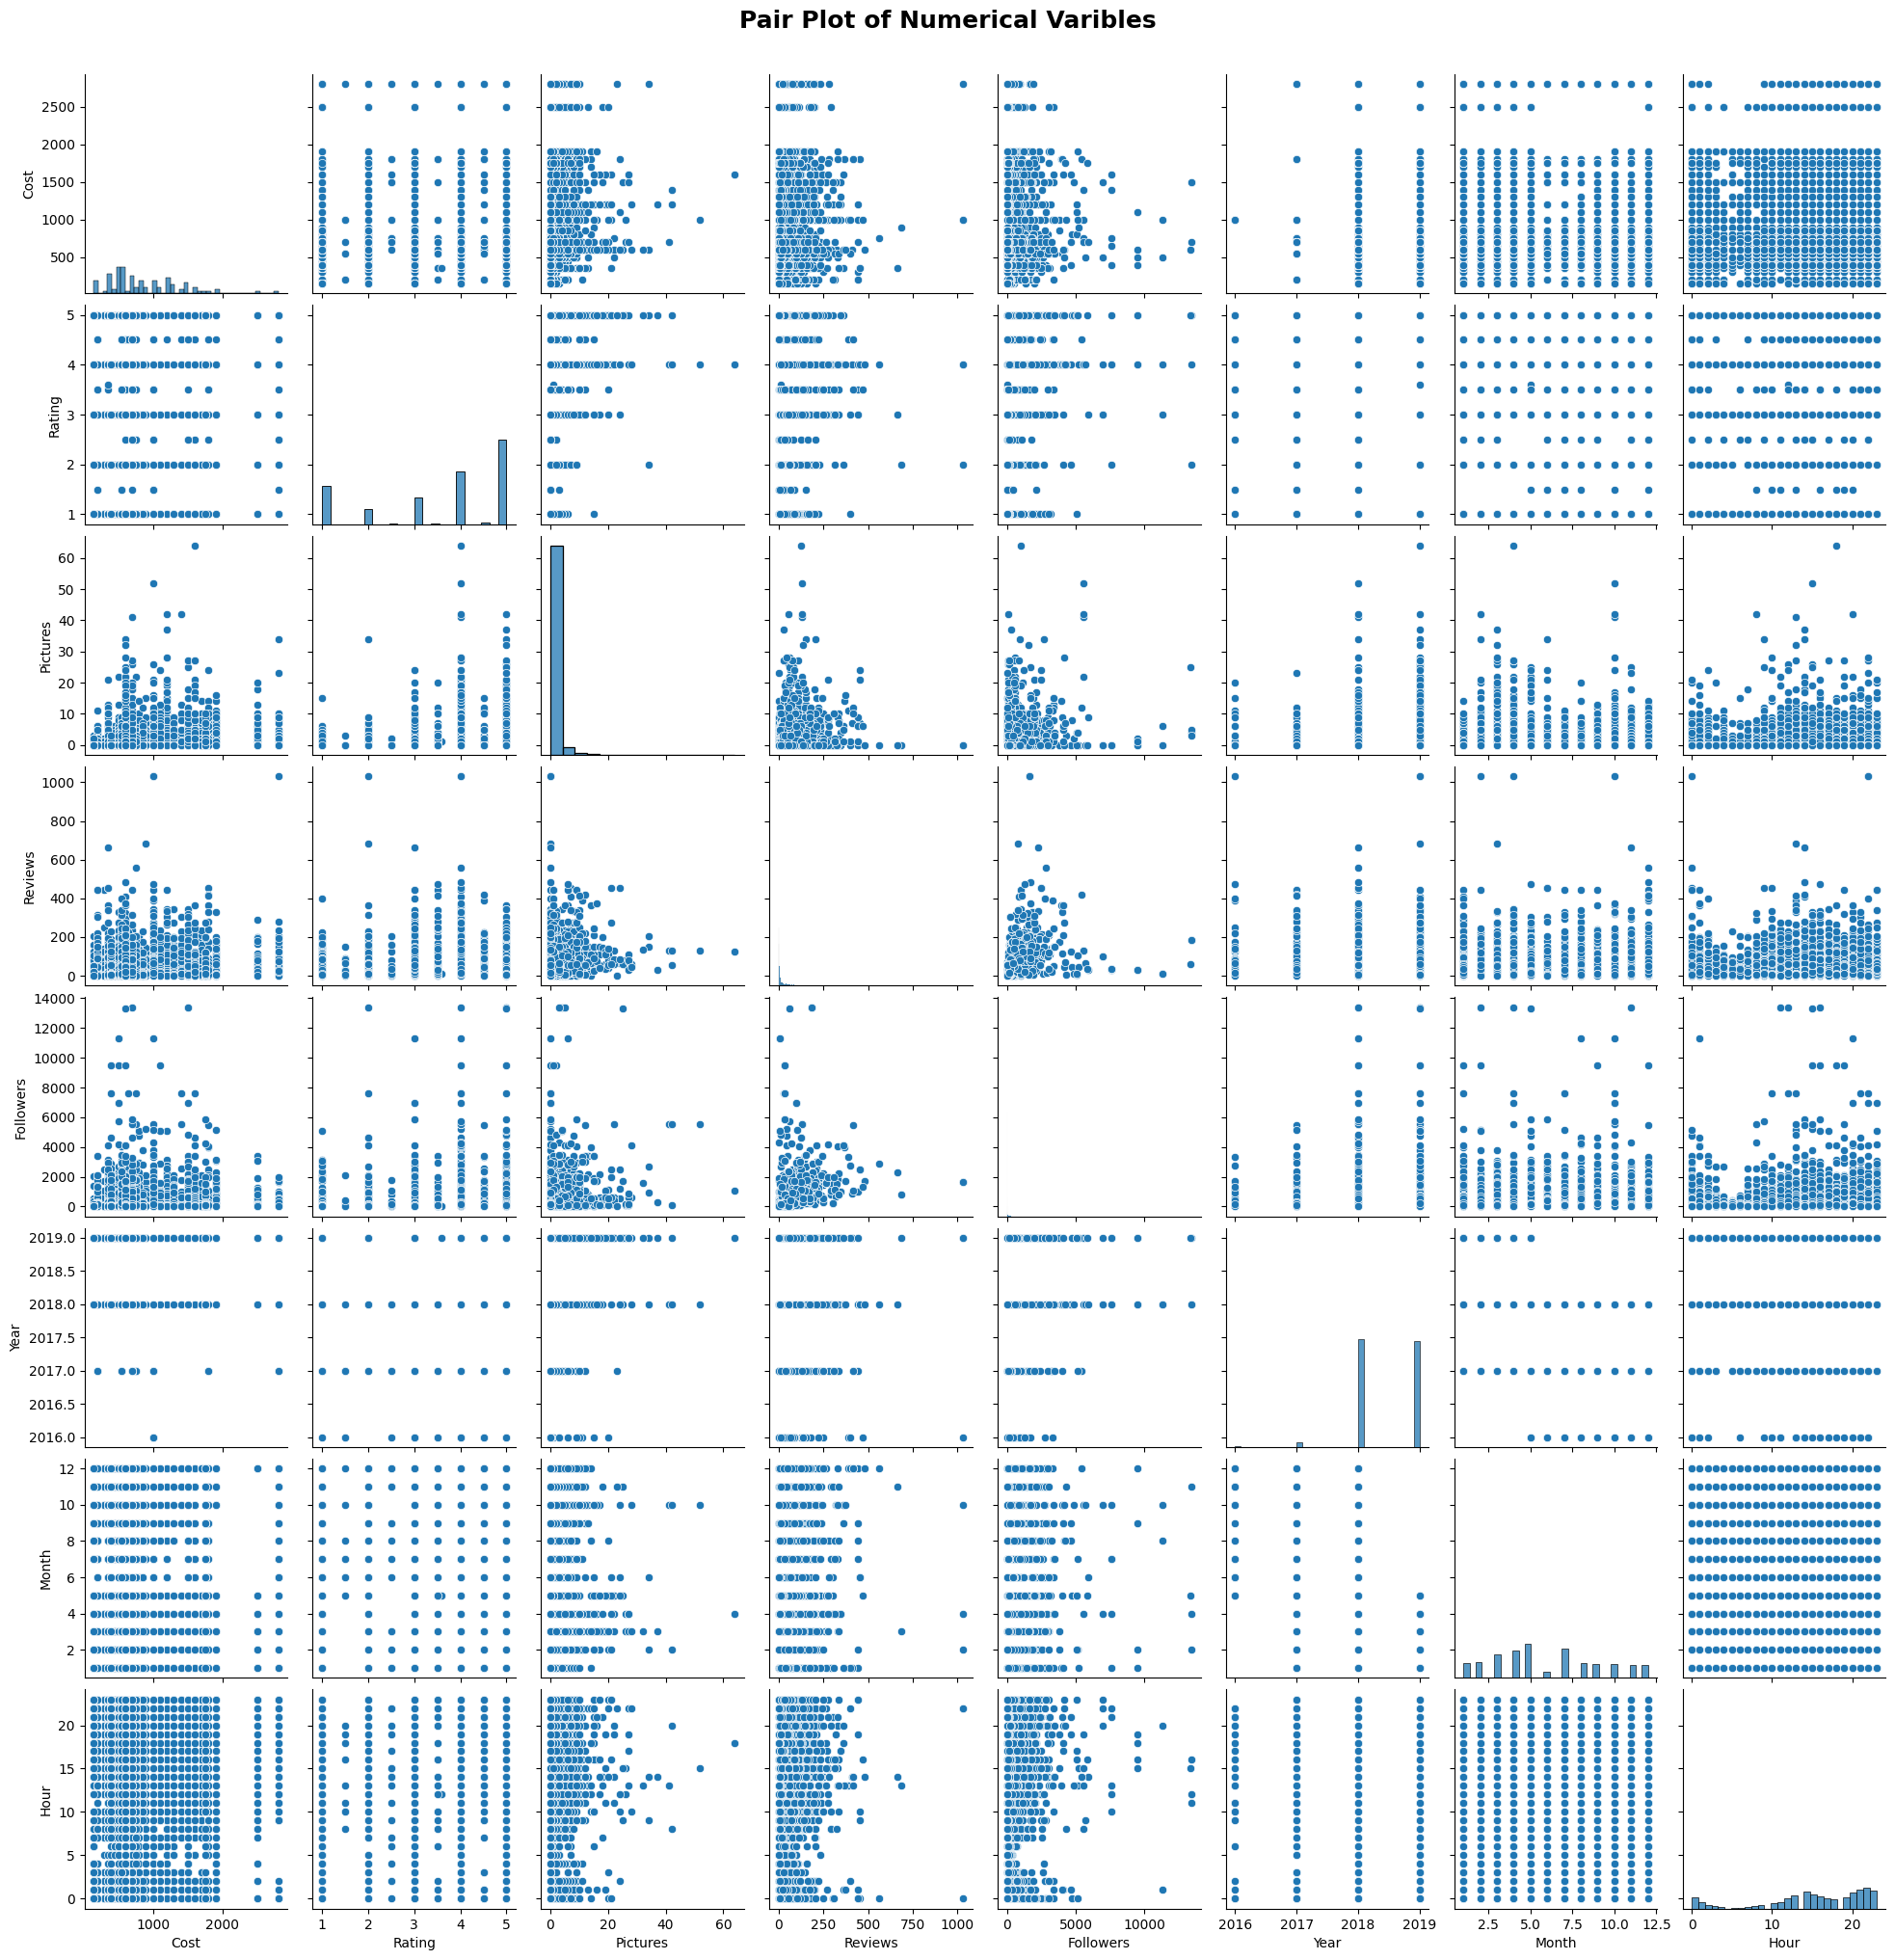

In [65]:
pair_plot_variables = merged_df[numerical_columns]

# Create pair plot for numerical variables
sns.pairplot(pair_plot_variables)
plt.suptitle('Pair Plot of Numerical Varibles', size= 18, weight='bold', y= 1.02)

plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize the relationships between pairs of variables in the dataset. The pair plot displays scatter plots for every possible pair of variables on a single grid. This allows to visually assess both pairwise relationships and identify potential patterns or trends across all variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

There are not many promising relations shown in the chart, but some insights are as follows:

- Followers vs. Reviews: The right-skewed distribution suggests that reviewers with a higher number of followers tend to post a significant number of reviews.

- Year vs. Cost: The scatter plot indicates that restaurant costs have a tendency to increase slightly over the years.

- Rating vs. Pictures: The scatter plot suggests that restaurants with more pictures tend to have slightly higher ratings, indicating that visual content may influence customer perceptions and satisfaction.

## ***5 Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [66]:
# Handling Missing Values & Missing Value Imputation
merged_df.isnull().sum()

Restaurant         0
Cost               0
Collections        0
Cuisines           0
Reviewer           0
Review             0
Rating             0
Time               0
Pictures           0
Reviews            0
Followers          0
Year               0
Month              0
Hour               0
DayOfWeek          0
Rating_Category    0
Review_Length      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values in the dataset, there is no need to use any missing value imputation techniques.

### 2. Handling Outliers

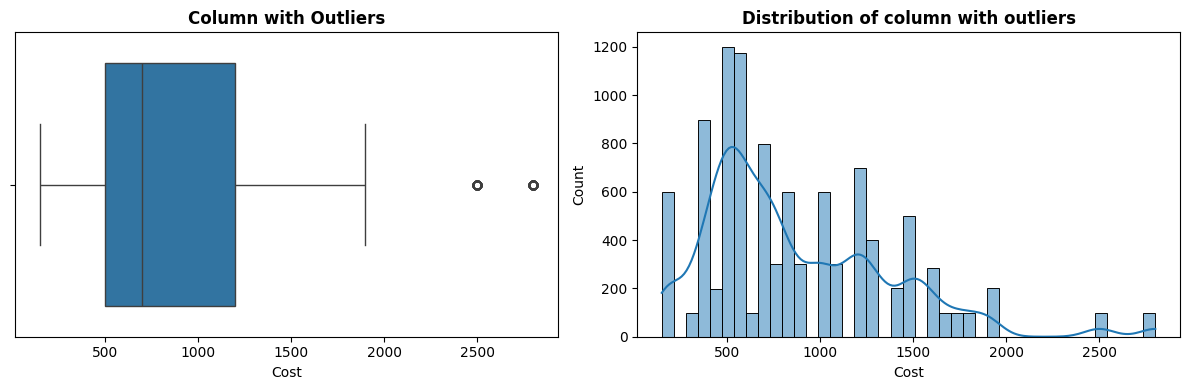

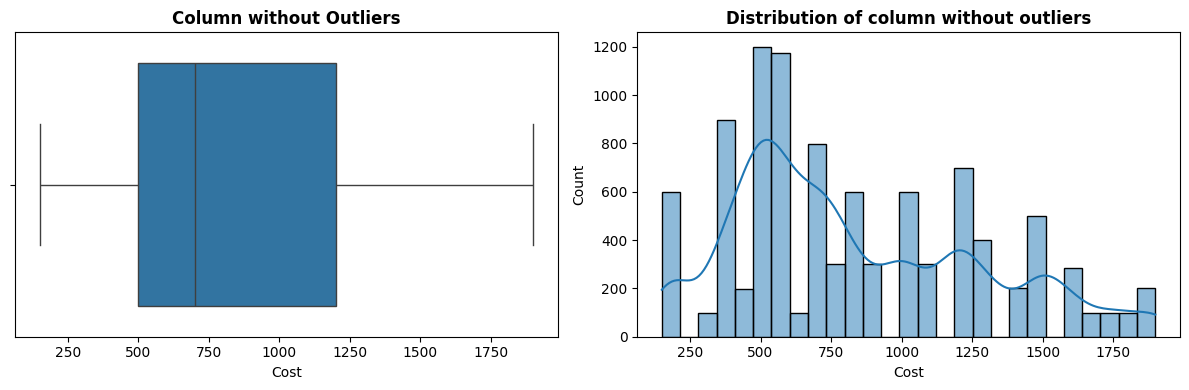

In [67]:
# Identifying Outliers
plt.figure(figsize= (12, 4))
plt.subplot(1, 2, 1)

# Plot 1. Boxplot before removing outliers
sns.boxplot(x= merged_df['Cost'])
plt.title('Column with Outliers', size= 12, weight='bold')

# Plot 2. Distribution of column with outliers
plt.subplot(1, 2, 2)
sns.histplot(merged_df['Cost'], kde= True)
plt.title('Distribution of column with outliers', size= 12, weight='bold')
plt.tight_layout()

# Calculate the Inter Quartile Range (IQR)
Q1 = merged_df['Cost'].quantile(0.25)
Q3 = merged_df['Cost'].quantile(0.75)

IQR = Q3 -Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
merged_df = merged_df[(merged_df['Cost'] >= lower_bound) & (merged_df['Cost'] <= upper_bound)]

plt.figure(figsize= (12, 4))
plt.subplot(1, 2, 1)

# Plot 1. Boxplot after removing outliers
sns.boxplot(x= merged_df['Cost'])
plt.title('Column without Outliers', size= 12, weight='bold')

# Plot 2. Distribution of column without outliers
plt.subplot(1, 2, 2)
sns.histplot(merged_df['Cost'], kde= True)
plt.title('Distribution of column without outliers', size= 12, weight='bold')
plt.tight_layout()

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Initially, outliers were identified by plotting boxplot and histogram to check the distribution of 'Cost' column.

2. An Inter Quartile Range (IQR) method was used to identofy and remove outliers.

3. After treating outliers, column was checked again using same plots.

The IQR method was chosen because it is resistant to outliers and extreme values, making it suitable for handling noisy data and minimizing the impact of outliers. It helps maintain a balance between outlier removal and retaining sufficient data for analysis.


### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [68]:
# Convert review text to lower case
merged_df.loc[:, 'Review'] = merged_df['Review'].str.lower()
merged_df['Review']

0       the ambience was good, food was quite good . h...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
9950    madhumathi mahajan well to start with nice cou...
9951    this place has never disappointed us.. the foo...
9952    bad rating is mainly because of "chicken bone ...
9953    i personally love and prefer chinese food. had...
9954    checked in here to try some delicious chinese ...
Name: Review, Length: 9755, dtype: object

#### 2. Removing Punctuations

In [69]:
merged_df.loc[:, 'Review'] = merged_df['Review'].str.replace('[^a-zA-Z\s]', '', regex= True)
merged_df['Review']

0       the ambience was good food was quite good  had...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9950    madhumathi mahajan well to start with nice cou...
9951    this place has never disappointed us the food ...
9952    bad rating is mainly because of chicken bone f...
9953    i personally love and prefer chinese food had ...
9954    checked in here to try some delicious chinese ...
Name: Review, Length: 9755, dtype: object

#### 3. Removing URLs & Removing words and digits contain digits.

In [70]:
import re

# Removing URLs & Removing words and digits contain digits.
def clean_review(text):
  """
  Function to remove URLs, words and digits containing digits.

  Args:
  - text (str): Input text to be cleaned.

  Returns:
  - clean_text (str): Cleaned text with URLs removed and words containing digits filtered out.
  """
  # Remove URLs
  new_text = re.sub(r'http\S+|www\S+', '', text)

  # Remove words containing digits
  clean_text = ' '.join(word for word in new_text.split() if not any(char.isdigit() for char in word))

  return clean_text

In [71]:
# Apply the function to the 'Review' column
merged_df.loc[:, 'Review'] = merged_df['Review'].apply(clean_review)
merged_df['Review']

0       the ambience was good food was quite good had ...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9950    madhumathi mahajan well to start with nice cou...
9951    this place has never disappointed us the food ...
9952    bad rating is mainly because of chicken bone f...
9953    i personally love and prefer chinese food had ...
9954    checked in here to try some delicious chinese ...
Name: Review, Length: 9755, dtype: object

#### 4. Removing Stopwords & Removing White spaces

In [72]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Removing Stopwords & Removing White spaces
def remove_stopwords(text):
  """
  Function to remove stopwords and white spaces.

  Args:
  - text (str): Input text from which stopwords will be removed.

  Returns:
  - clean_text (str): Text with stopwords removed and extra whitespaces stripped.
  """
  # Remove stopwords
  no_stopwords = ' '.join(word for word in text.split() if word not in stop_words)

  # Remove extra whitespaces
  clean_text = re.sub(r'\s+', ' ', no_stopwords).strip()

  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# Apply the function to the 'Review' column
merged_df.loc[:, 'Review'] = merged_df['Review'].apply(remove_stopwords)
merged_df['Review']

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9950    madhumathi mahajan well start nice courteous s...
9951    place never disappointed us food courteous sta...
9952    bad rating mainly chicken bone found veg food ...
9953    personally love prefer chinese food couple tim...
9954    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9755, dtype: object

In [74]:
# Finding words with length of characters greater than 30 and less than or equal to 2
def find_long_short_words(df):
  """
  Function to find words with lengths greater than 30 characters
  and less than or equal to 2 characters from the 'Review' column of a DataFrame.

  Args:
  - df (DataFrame): Input DataFrame containing a 'Review' column.

  Prints:
  - Long words: Words with lengths greater than 30 characters.
  - Short words: Words with lengths less than or equal to 2 characters.
  """
  long_words = []
  short_words = []

  # Iterate through each word in the 'Review' column
  for word in df['Review'].str.split():
    for text in word:
      if len(text) > 30:
        long_words.append(text)
      elif len(text) <= 2:
        short_words.append(text)

  # Print long words
  print("\033[1mLong words:\033[0m\n")
  for word in long_words:
    print(word)

  # Print short words
  print("\n\033[1mShort words:\033[0m\n")
  print(short_words[:30])

find_long_short_words(merged_df)

Long words:

ggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggd
ggggggggggggggggggghhhggggggggggggggggggggggggggg
ggggggghhhggggggggggggggggggggggggggggggggggggggggggggggggghhhhhhhhhhhhhhgggggggggggg
gggggggggggggggggggggggggggggggggggggjhhghhhhghhgghhghhhgghhggghhhghhggghhgggggggffgghgg
gggggggghhhhhhhhhgggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggg
ggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggygggyggyyyygggggggggghh
ggggggggggggggggggggghghhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
isjejiiuhjwkwjjjekejekekmjhfjkksjdjjrjdkedidj
iiiittttttttttttttttttttttttttt
supersupersupersupersupersupersupersupersupersupersupersupersupersupersupersupersupersuper
hhsjoibohoogogigivigigugihohohohphpjpjpjjohohohohohohohohohohojojojpjpjpjohpjpjohohohohhjohojpjojohohohohohhohohohojojojojohohohigufufyfyfufufugkbkhkhkgigkghighihhohohih
udjjsekjawigsjeisijueusoawjhssslbsksoegjsfak
hdaivdbskbduauhsjsjjskakskskskhdvdhsjs
goodgoodgoodgoodgood

In the scope of our NLP analysis, these excessively long words are considered non-informative and will be omitted from our further processing steps. This ensures that our analysis remains focused on extracting meaningful insights from the text data, enhancing the accuracy and relevance of our findings.

In [75]:
# Remove short and long words
def remove_inconsistencies(reviews_text):
  """
  Function to remove words with lengths greater than 30 characters
  and less than or equal to 2 characters from a text.

  Args:
  - reviews_text: Input text containing words to be filtered.

  Returns:
   Cleaned text with filtered words removed.
  """
  reviews = " ".join(word for word in reviews_text.split() if len(word) > 2 and len(word) <= 30)

  return reviews

In [76]:
merged_df.loc[:, 'Review'] = merged_df['Review'].apply(lambda x: remove_inconsistencies(x))
merged_df['Review']

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9950    madhumathi mahajan well start nice courteous s...
9951    place never disappointed food courteous staff ...
9952    bad rating mainly chicken bone found veg food ...
9953    personally love prefer chinese food couple tim...
9954    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9755, dtype: object

In [77]:
find_long_short_words(merged_df)

Long words:


Short words:

[]


#### 5. Tokenization

In [78]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def tokenize_review(review):
  """
  Function to tokenize the review column
  """
  return nltk.word_tokenize(review)

In [80]:
merged_df.loc[:, 'Review'] = merged_df['Review'].apply(tokenize_review)

In [81]:
print(merged_df['Review'])

0       [ambience, good, food, quite, good, saturday, ...
1       [ambience, good, pleasant, evening, service, p...
2       [must, try, great, food, great, ambience, thnx...
3       [soumen, das, arun, great, guy, behavior, sinc...
4       [food, goodwe, ordered, kodi, drumsticks, bask...
                              ...                        
9950    [madhumathi, mahajan, well, start, nice, court...
9951    [place, never, disappointed, food, courteous, ...
9952    [bad, rating, mainly, chicken, bone, found, ve...
9953    [personally, love, prefer, chinese, food, coup...
9954    [checked, try, delicious, chinese, food, seen,...
Name: Review, Length: 9755, dtype: object


#### 6. Text Normalization

In [82]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Stemming
from nltk.stem import SnowballStemmer

# Initialize the stemmer
stemmer = SnowballStemmer("english")

def stemming(text):
  """
  Function to stem each word in the given text
  """
  text = [stemmer.stem(word) for word in text]

  return " ".join(text)

In [83]:
merged_df.loc[:, 'Review'] = merged_df['Review'].apply(stemming)

##### Which text normalization technique have you used and why?

The text normalization technique used is stemming. Stemming reduces words to their base or root form by removing suffixes. The Snowball Stemmer with the English language setting is applied to each word in the 'Review' column of the DataFrame. Stemming is chosen to reduce variations in words and simplify the representation of text data for tasks like bag-of-words.

#### 7. Text Vectorization

In [84]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize tf-idf vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Fit the vectorizer using the text data
tfidf_vectorizer.fit(merged_df['Review'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf_vectorizer.vocabulary_.items()

##### Which text vectorization technique have you used and why?

The text vectorization technique used is TF-IDF (Term Frequency-Inverse Document Frequency). This technique calculates the importance of words in a document while considering their rarity across the entire dataset. By excluding common English stop words, TF-IDF focuses on meaningful and distinguishing terms, making it suitable for tasks such as information retrieval and document classification.

### 8. Sentiment Analysis

In [85]:
from textblob import TextBlob

# Get Sentiment Subjectivity
def sentiment_subjectivity(text):
  """
  Function to get sentiment subjectivity
  """
  return TextBlob(text).sentiment.subjectivity

In [86]:
# Get Sentiment Polarity
def sentiment_polarity(text):
  """
  Function to get sentiment polarity
  """
  return TextBlob(text).sentiment.polarity

In [87]:
# Classify the sentiment
def sentiment(score):
  """
  Function to classify sentiment analysis score into categories.
  """
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
# Apply the function to create new columns for sentiment features
merged_df.loc[:, 'Sentiment_Subjectivity'] = merged_df['Review'].apply(sentiment_subjectivity)
merged_df.loc[:, 'Sentiment_Polarity'] = merged_df['Review'].apply(sentiment_polarity)
merged_df.loc[:, 'Sentiment'] = merged_df['Sentiment_Polarity'].apply(sentiment)

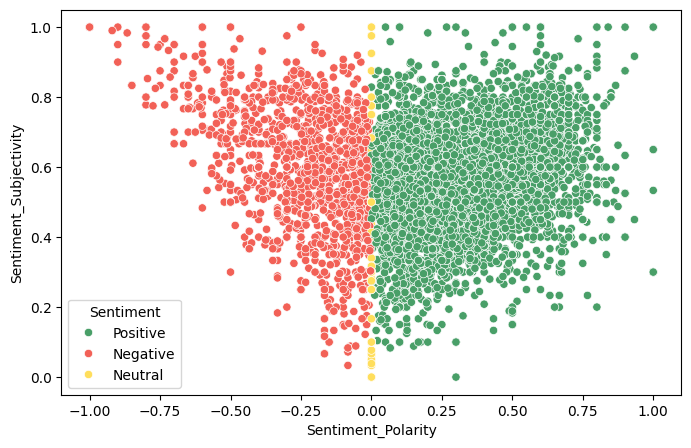

In [89]:
colors = ['#499f68', '#f26157', '#ffde5c']
# Visualize sentiment features
plt.figure(figsize= (8, 5))
sns.scatterplot(data= merged_df, x= 'Sentiment_Polarity', y= 'Sentiment_Subjectivity', hue= 'Sentiment', palette= colors)

plt.show()

Extracted Sentiment Subjectivity and Sentiment Polarity using the TextBlob library.

- Sentiment Subjectivity is a measure of the review's sentiment on a scale of 0 to 1, where 0 represents a factual statement and 1 represents a highly opinionated statement.

- Sentiment polarity is a measure of the positivity or negativity of the review, on a scale of -1 to 1. Here, 1 means a positive review, -1 means a negative review and 0 indicates a neutral review.

- Based on sentiment polarity, the reviews were then classified into positive, negative, or neutral categories.


In [90]:
# Function to convert sentiment to numeric values
def sentiment(analysis):
  """
  Convert sentiment analysis results to numeric values.
  Positive and Neutral = 0
  Negative = 1

  Args:
  - analysis: Sentiment analysis result ('Positive', 'Neutral', 'Negative')

  Returns:
  - int: 0 for Positive/Neutral, 1 for Negative
  """
  if analysis == 'Positive' or analysis == 'Neutral':
    return 0
  elif analysis == 'Negative':
    return 1

In [91]:
# Apply the function
merged_df.loc[:, 'Sentiment'] = merged_df['Sentiment'].apply(lambda x: sentiment(x))

In [92]:
merged_df['Sentiment'].unique()

array([0, 1], dtype=object)

### ***6. Feature Manipulation & Selection***

#### 1. Feature Selection

In [93]:
# Selecting features from merge_df into a new dataframe
sentiment_df = merged_df[['Review', 'Rating', 'Sentiment']]
print(sentiment_df.head())

                                              Review  Rating Sentiment
0  ambienc good food quit good saturday lunch cos...     5.0         0
1  ambienc good pleasant even servic prompt food ...     5.0         0
2  must tri great food great ambienc thnx servic ...     5.0         0
3  soumen das arun great guy behavior sincereti g...     5.0         0
4  food goodw order kodi drumstick basket mutton ...     5.0         0


### 2. Data Splitting

In [94]:
# Split data to train and test
x = sentiment_df['Review']
y = sentiment_df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, stratify= sentiment_df['Sentiment'])

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (7316,)
Shape of x_test: (2439,)
Shape of y_train: (7316,)
Shape of y_test: (2439,)


##### What data splitting ratio have you used and why?

I have used 75 - 25 data splitting ratio, allocating 75% for training and 25% for testing. This is a common and balanced approach to ensure enough data for training and reliable evaluation of model performance.

The **stratify parameter** in train_test_split is used to ensure that the distribution of classes in the training and testing sets is similar to the distribution of classes in the original dataset. This is particularly useful when dealing with imbalanced datasets where some classes are underrepresented.

In our case, stratify = sentiment_df['Sentiment'] means that the train-test split will be done in such a way that the proportion of each sentiment category (Positive, Neutral, Negative) in the training and testing sets will be the same as in the original sentiment_df['Sentiment'].


### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [95]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform training data
x_train= vectorizer.fit_transform(x_train)

# Transform test data
x_test = vectorizer.transform(x_test)

I have used TF-IDF Vectorizer method to transorm training and testing data. TF-IDF Vectorizer is a commonly used method for data transformation in Natural Language Processing (NLP). It transforms text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF), which reflects how important a word is to a document in a collection of documents.

## ***7. ML Model Implementation***

### ML Model - 1

In [96]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [101]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [104]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [105]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***